## 1. Описание проекта

Перед нами интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные до 2016 года. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
# !pip3 install seaborn>=0.12

Использую библиотеку Seaborn версии 0.12 и старше для построения графиков

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from scipy import stats as st

sns.set_style("whitegrid")

In [3]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2. Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм на 16715 строк. Не хватает значительного количества оценок критиков и пользователей, а также рейтинга ESRB. Тип данных пользовательских оценок говорит о том, что в данных есть текстовые оценки, и скорее всего - это 'None'. По два пропуска с названиями игр и жанров можно разбрать поотдельности. В данных по продажам пропусков нет, но есть минимальные значения - ноль. Может быть, что данных по продажам для некоторых игр не существует, и во всех регионах продажи равны нулю. Такие данные нужно удалить. Пропуски в "годе релиза" не так критичны, можно попробовать их восстановить.

## 3. Подготовка данных

In [7]:
df.duplicated().sum()

0

### Переименование колонок

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df = df.rename(columns={
    'year_of_release': 'year',
})

### Пропуски 'name' и 'genre'

In [10]:
df[df['name'].isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как раз отсутствующие дынные по названию и по жанру совпадают. Удаляем их, здесь нет никакой информации.

In [11]:
df = df[df['name'].notna()]

### Оценки пользователей

Посмотрим на уникальные значения в колонке с оценками пользователей.

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
df['user_score'].value_counts(dropna=False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

2424 значения 'tbd'. Аббревиатура, которая говорит о том, что значение еще не определено. Можно заменить на NaN. А можно использовать метод to_numeric() с аргументом errors='coerce', который автоматически заменить все нечисловые значения на NaN

In [14]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

### Пропуски в годах

In [15]:
df['year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [16]:
df['year'].isna().sum()/df.shape[0]

0.016095255190570215

Пропусков в данных с годом релиза 1.6 процента. Не так много, чтобы пытаться восстановить. Отбросим их.

In [17]:
df = df.query('year.notna()')

In [18]:
df['year'] = df['year'].astype('int')

### Дубликаты в названиях

Посмотрим дубликаты игр на одной платформе, в один год выпуска.

In [19]:
df[df[['name', 'platform', 'year']].duplicated(keep=False)]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Оставим только первую строку.

In [20]:
df = df[~df[['name', 'platform', 'year']].duplicated(keep='first')]

В датасете есть еще одна неприятность - названия игра содержат строку 'sales', из-за которой создаются еще дубликаты.

In [21]:
df[df['name'].str.contains(pat='sales', case=False)]['name'].nunique()/df.shape[0]

0.008575077540594781

Таких данных совсем немного. Отбросим их. Но для уверенности посмотрим какие строки могут быть в названиях.

In [22]:
set([x[x.rfind('('):].lower() for x in df[df['name'].str.contains(pat='sales', case=False)]['name'].values])

{'(all region sales)',
 '(all regions sales)',
 '(america weekly sales)',
 '(american and others sales)',
 '(american sales)',
 '(correct us sales)',
 '(higher jp sales)',
 '(japan sales)',
 '(jp & incomplete us sales)',
 '(jp & others sales)',
 '(jp sales)',
 '(jp sales, but wrong system)',
 '(jp weekly sales)',
 '(old all region sales)',
 '(old jp sales)',
 '(old us sales)',
 '(others sales)',
 '(sales, but wrong system)',
 '(us & others sales)',
 '(us sales)',
 '(us weekly sales)',
 '(weekly american sales)',
 '(weekly jp sales)'}

In [23]:
# В этой строке код для избавления от лишних строк в названии, на всякий случай.
# df.loc[df['name'].str.contains('sales', case=False), 'name'] = df['name'].apply(lambda name: name[:name.rfind('(')-1])

In [24]:
df = df[~df['name'].str.contains(pat='sales', case=False)]

In [25]:
df[df['name'].str.contains(pat='sales', case=False)].shape[0]

0

Посмотрим сколько теперь дублирующихся строк с названиями игр, учитывая платформу на которой вышла игра.

In [26]:
df[df[['name', 'platform', 'year']].duplicated(keep=False)].shape[0]

0

Проверим еще раз на дубликаты по платформам без учета года выпуска.

In [27]:
df[df[['name', 'platform']].duplicated(keep=False)].sort_values('name')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


Всё нормально. Гугл говорит, что это разные игры.

### Нулевые продажи

Проверим данные с нулевыми продажами

In [28]:
df.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


Ни оценок, ни продаж. Это надо убрать. А еще видно, что в названиях игр есть год, это может пригодится для заполнения пропусков года релиза.

In [29]:
df = df.query('~(na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0)')

### Рейтинг ESRB

Посмотрим на значения в столбце с рейтингом.

In [30]:
df['rating'].value_counts(dropna=False)

NaN     6528
E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Пропуски здесь заполню значением 'unknown', т.к. нет какой-то универсальной оценки подходящей ко всем играм.

In [31]:
df['rating'] = df['rating'].fillna('unknown')

Рейтинг 'K-A' был заменен на 'E' 1 января 1998 г. Заменим и мы.

In [32]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

Остаются три несущественные группы с рейтингом 'EC', 'RP' и 'AO'. Отбрасим их.

In [33]:
df = df.query('rating not in ["EC", "RP", "AO"]')

Можно заодно перевести тип данных в столбце в категориальный.

In [34]:
df['rating'] = df['rating'].astype('category')

Посмотрим на уникальные значения в разных столбцах на предмет неявных повторений.

In [35]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [36]:
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [37]:
df['year'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

Каких-то повторяющихся значений не наблюдается. Пару столбцов тоже можно перевести в категориальные данные.

In [38]:
df['genre'] = df['genre'].astype('category')
df['platform'] = df['platform'].astype('category')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16285 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          16285 non-null  object  
 1   platform      16285 non-null  category
 2   year          16285 non-null  int32   
 3   genre         16285 non-null  category
 4   na_sales      16285 non-null  float64 
 5   eu_sales      16285 non-null  float64 
 6   jp_sales      16285 non-null  float64 
 7   other_sales   16285 non-null  float64 
 8   critic_score  7980 non-null   float64 
 9   user_score    7459 non-null   float64 
 10  rating        16285 non-null  category
dtypes: category(3), float64(6), int32(1), object(1)
memory usage: 1.1+ MB


### Пропуски 'user_score'

In [40]:
df['user_score'].isna().sum()/df.shape[0]

0.5419711390850476

Посмотрим на гистограмму окрашенную в зависимости от года выпуска игры.

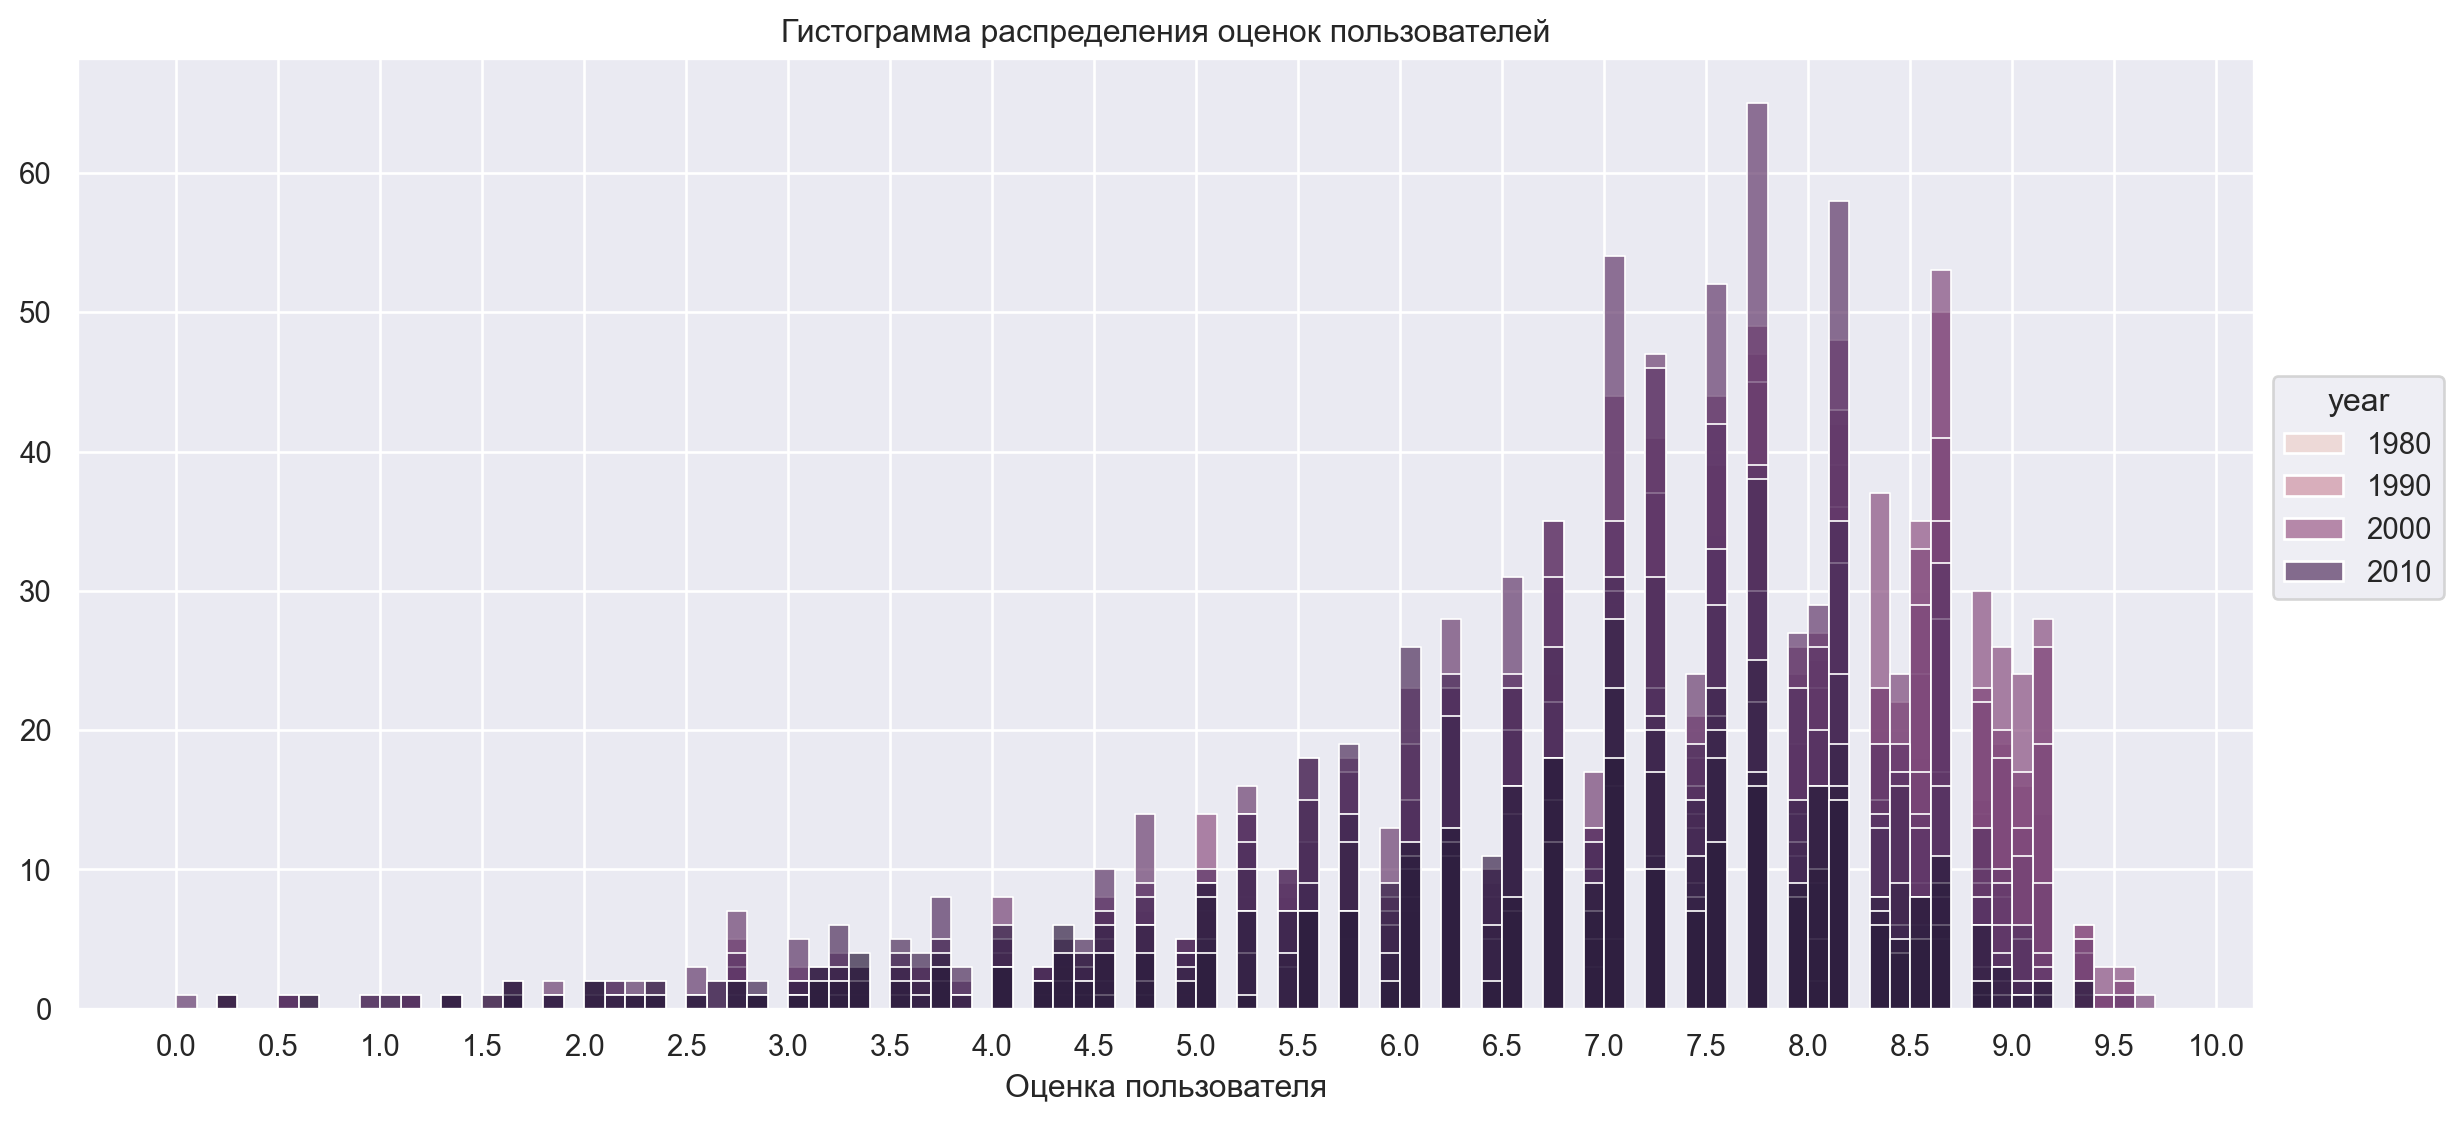

In [41]:
(
    so.Plot(
        data=df,
        x='user_score',
        color='year',
    )
    .add(so.Bars(), so.Hist(binwidth=0.1))
    .label(title='Гистограмма распределения оценок пользователей', x='Оценка пользователя', y='')
    .layout(size=(12, 6))
    .scale(x=so.Continuous().tick(every=.5))
)

Доля пропусков слишком большая. Данные представленны неравномерно. Некоторых оценок просто не существует. Восстановить данные корректно вряд ли получится.

Посмотрим на зависимость оценки пользователей от оценки критиков.

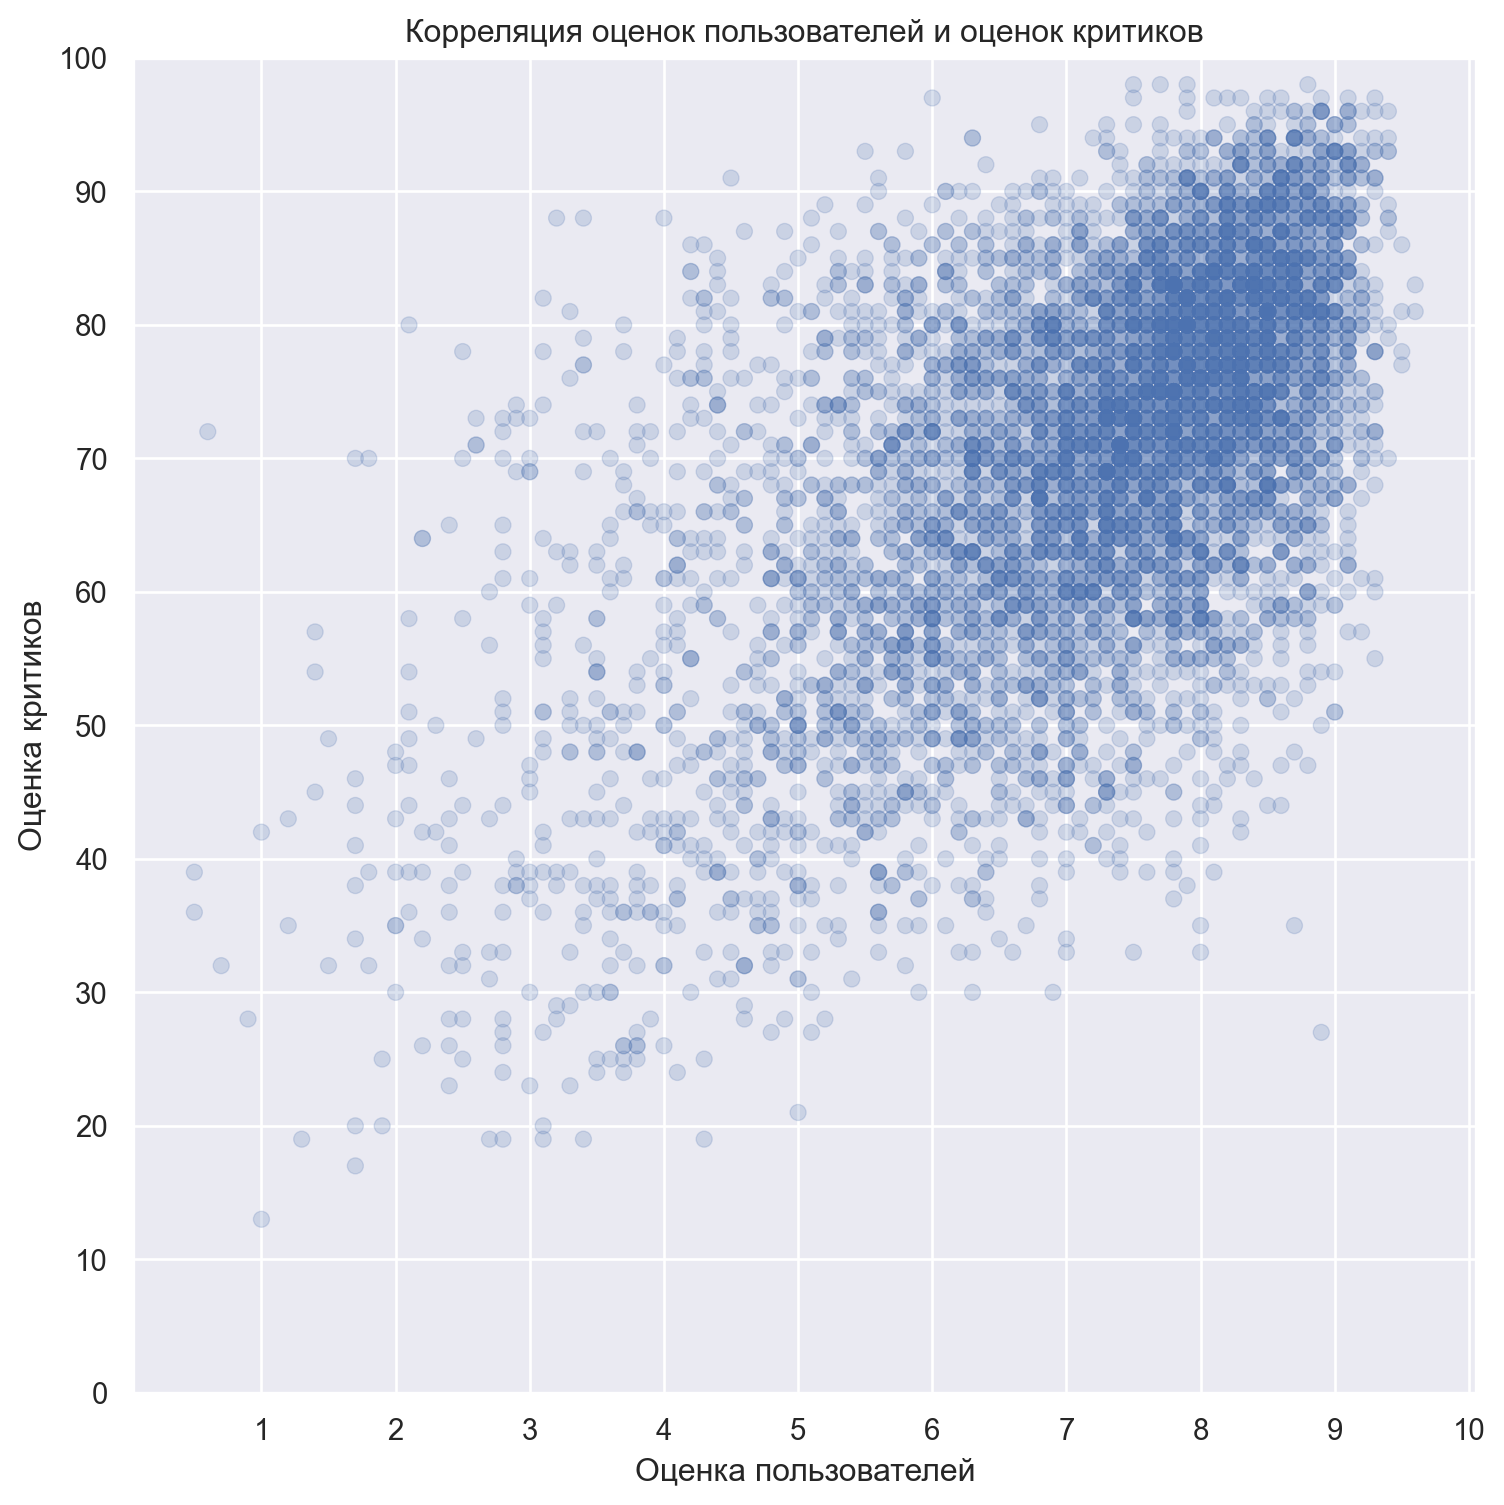

In [42]:
(
    so.Plot(
        data=df,
        x='user_score',
        y='critic_score',
    )
    .add(so.Dot(alpha=.2))
    .label(title='Корреляция оценок пользователей и оценок критиков', x='Оценка пользователей', y='Оценка критиков')
    .layout(size=(8, 8))
    .scale(x=so.Continuous().tick(every=1), y=so.Continuous().tick(every=10))
    .limit(y=(0, 100))
)

Оценки критиков практически повторяют оценки пользователей. Но пользователи почти не ставят оценки выше 9, в то время как критики часто доходят до 100.

### Сумма продаж

Для дальнейшей оценки создадим колонку с суммой продаж во всех регионах.

In [43]:
df['all_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

## 4. Исследовательский анализ данных

### Количество игр за разные годы

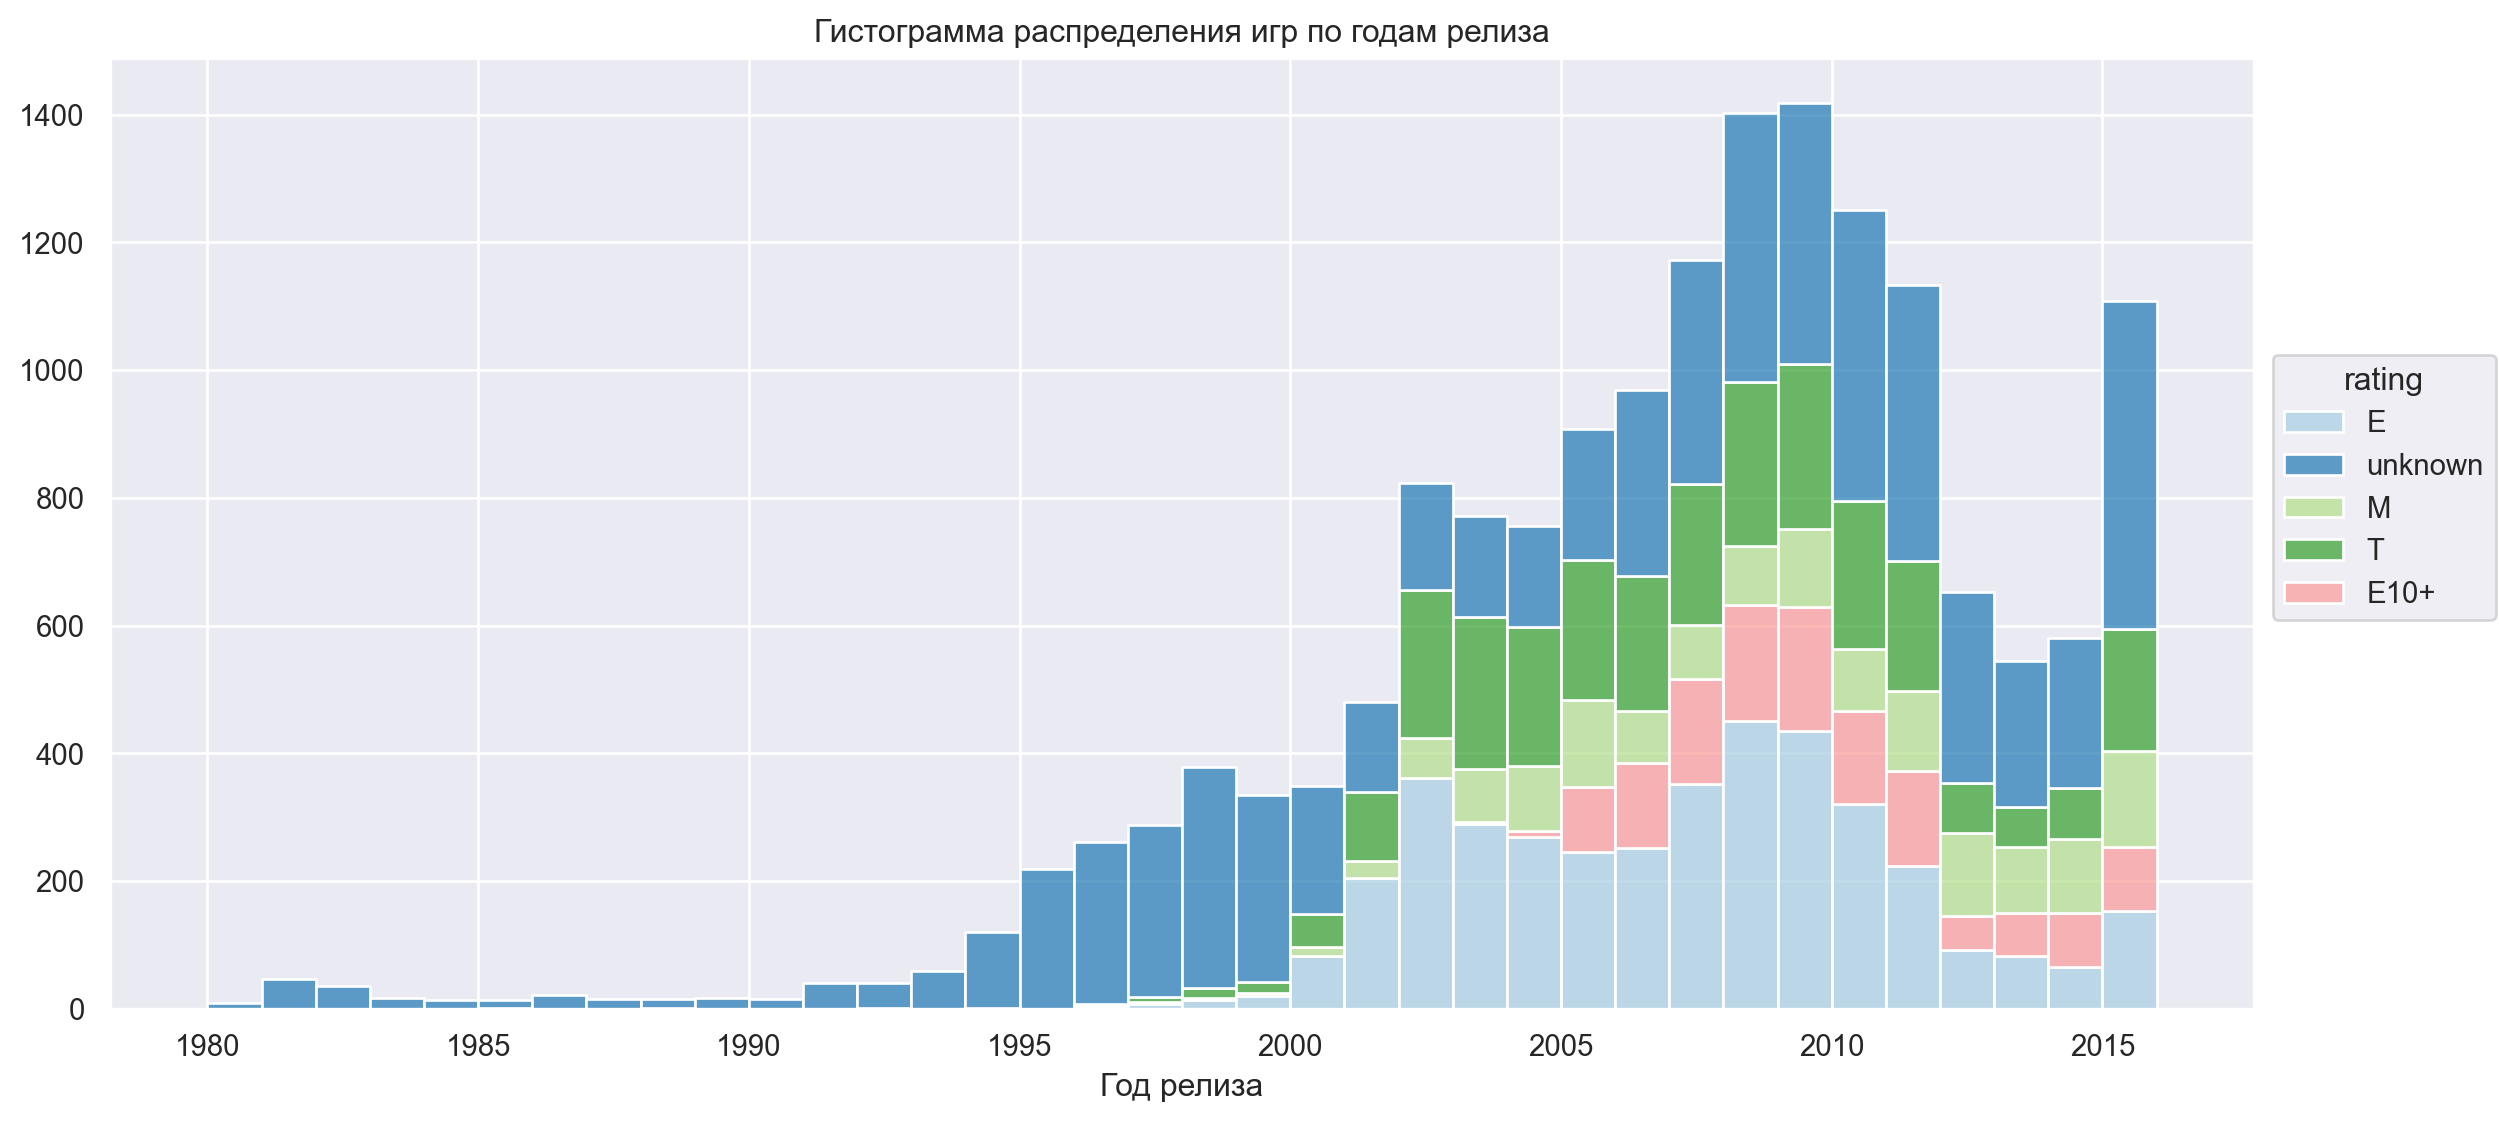

In [44]:
(
    so.Plot(
        data=df,
        x='year',
        color='rating',
    )
    .add(so.Bars(), so.Hist(binwidth=1), so.Stack())
    .label(title='Гистограмма распределения игр по годам релиза', x='Год релиза', y='')
    .layout(size=(12, 6))
    .scale(color="Paired")
)

Массовый выпуск игр начинается в середине 90-х. До 90 года данные можно вообще не расматривать. В начале 2000-х становится популярной рейтинговая система. Примерно с 2005 года либо вводится рейтинг для детей от 10, либо становятся популярны игры в данной категории. Пик производства игр приходится на 2009, и после это следует значительный спад. Но в последний год видим значительное восстановление в производстве игр, особенно учитыва, что за этот год данные не полные.

### Топовые платформы

Посмотрим какие платформы наиболее популярны.

In [45]:
df.groupby(['platform'])['all_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1218.40
X360     959.60
PS3      931.29
Wii      888.60
DS       794.79
PS       727.10
PS4      314.14
GBA      309.91
PSP      285.93
3DS      257.81
Name: all_sales, dtype: float64

PS вне конкуренции. Посмотрим на распределение среди топ-6 платформ на графике.

In [51]:
df.groupby(['platform'])['all_sales'].sum().sort_values(ascending=False).head(6).reset_index()['platform'].values

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
Categories (31, object): ['2600', '3DO', '3DS', 'DC', ..., 'WiiU', 'X360', 'XB', 'XOne']

In [52]:
df2 = df.query("platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']").copy()

In [53]:
df2['platform'] = df2['platform'].cat.remove_unused_categories()

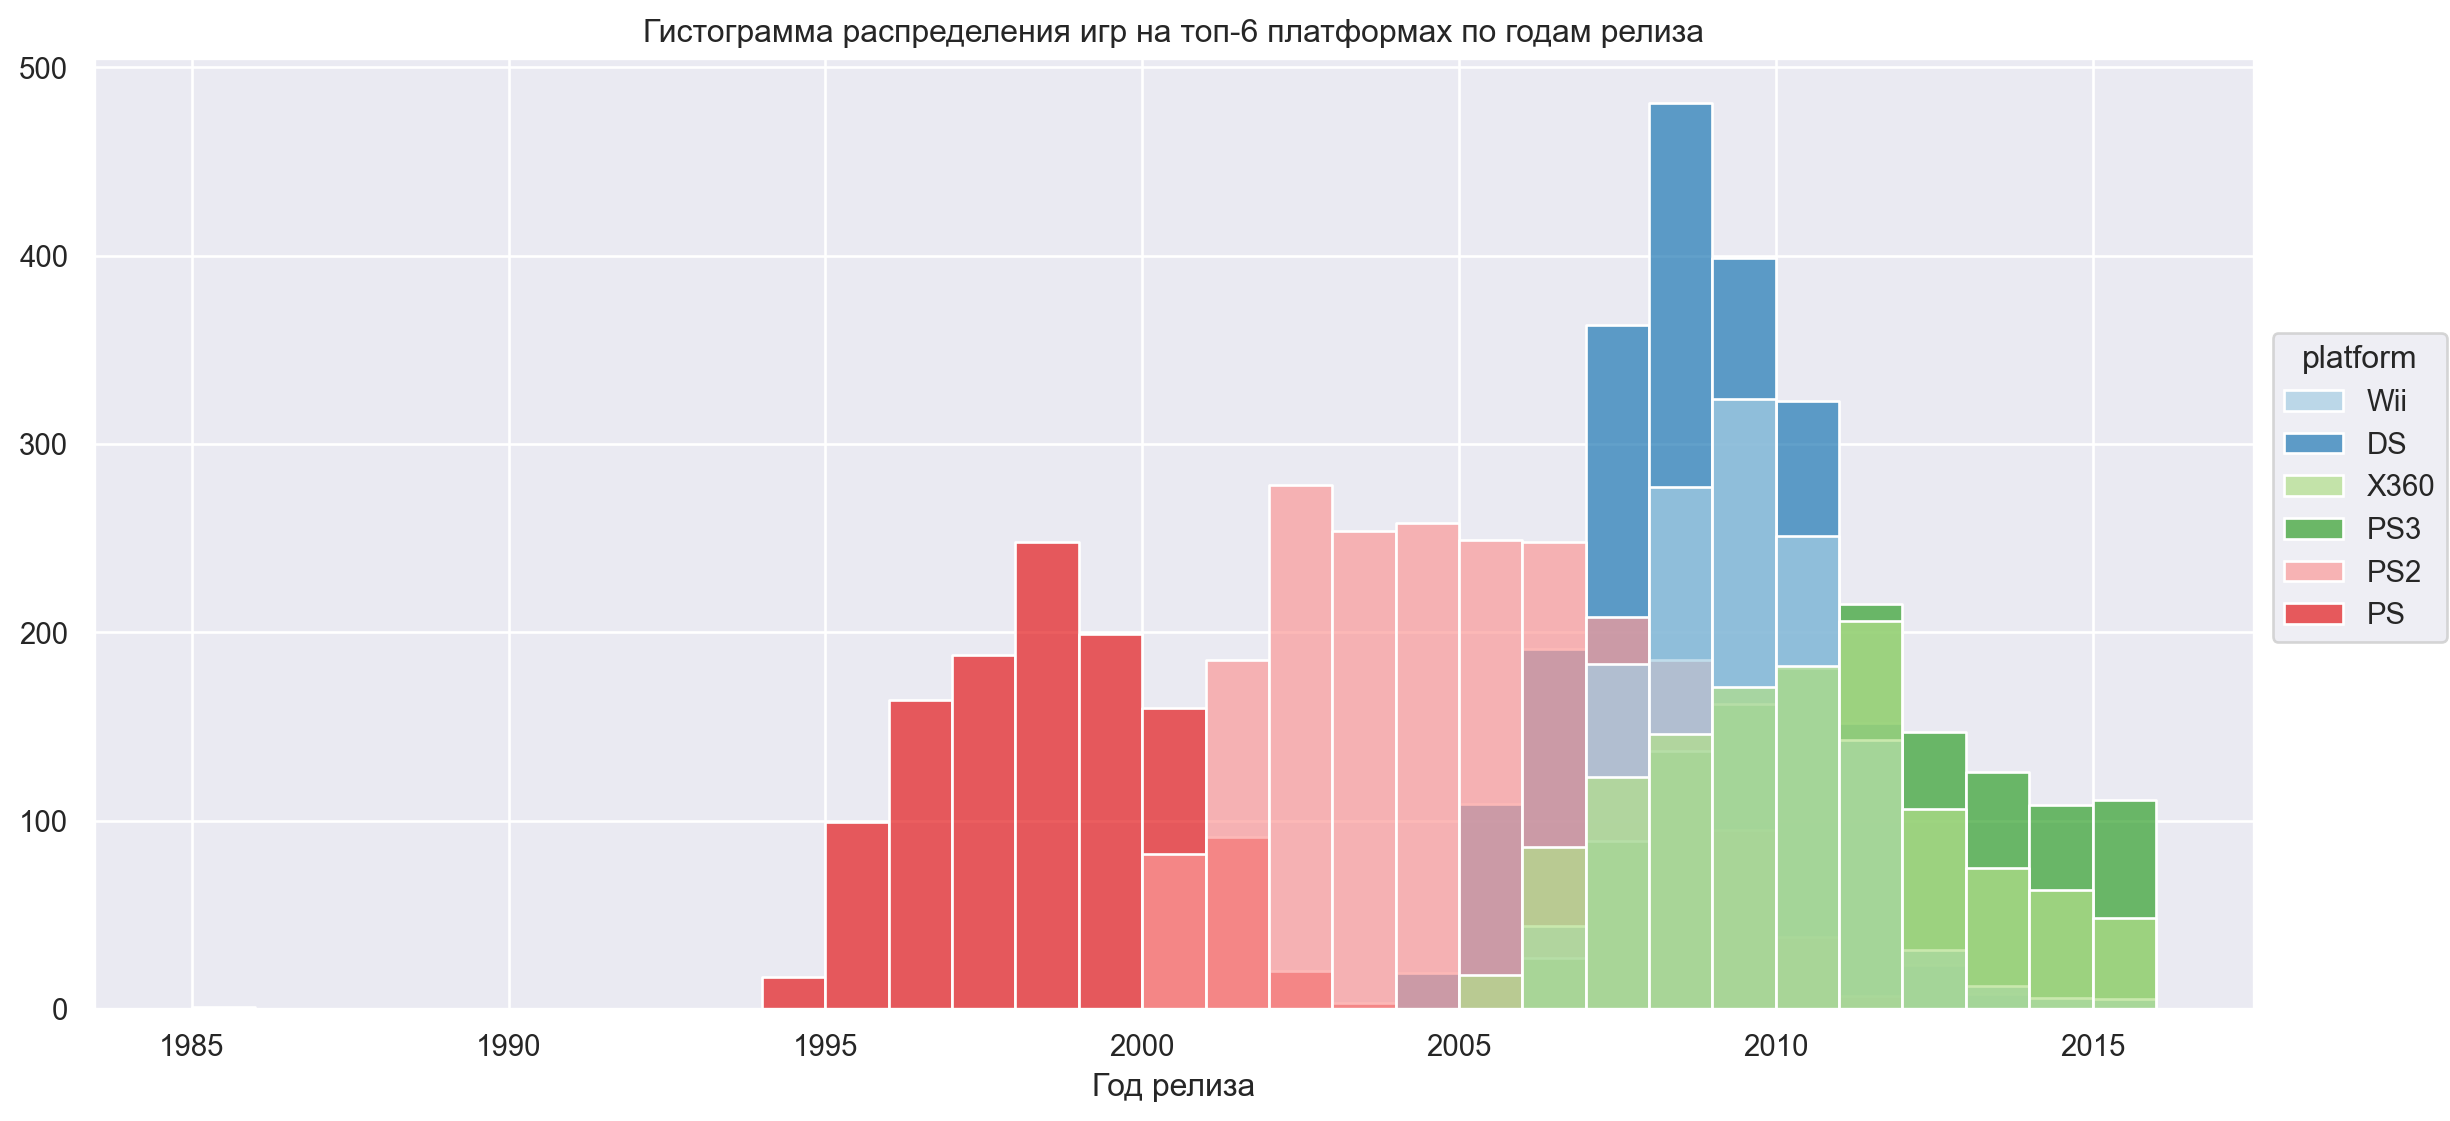

In [54]:
(
    so.Plot(
        data=df2,
        x='year',
        color='platform',
    )
    .add(so.Bars(), so.Hist(binwidth=1))
    .label(title='Гистограмма распределения игр на топ-6 платформах по годам релиза', x='Год релиза', y='')
    .layout(size=(12, 6))
    .scale(color="Paired")
)

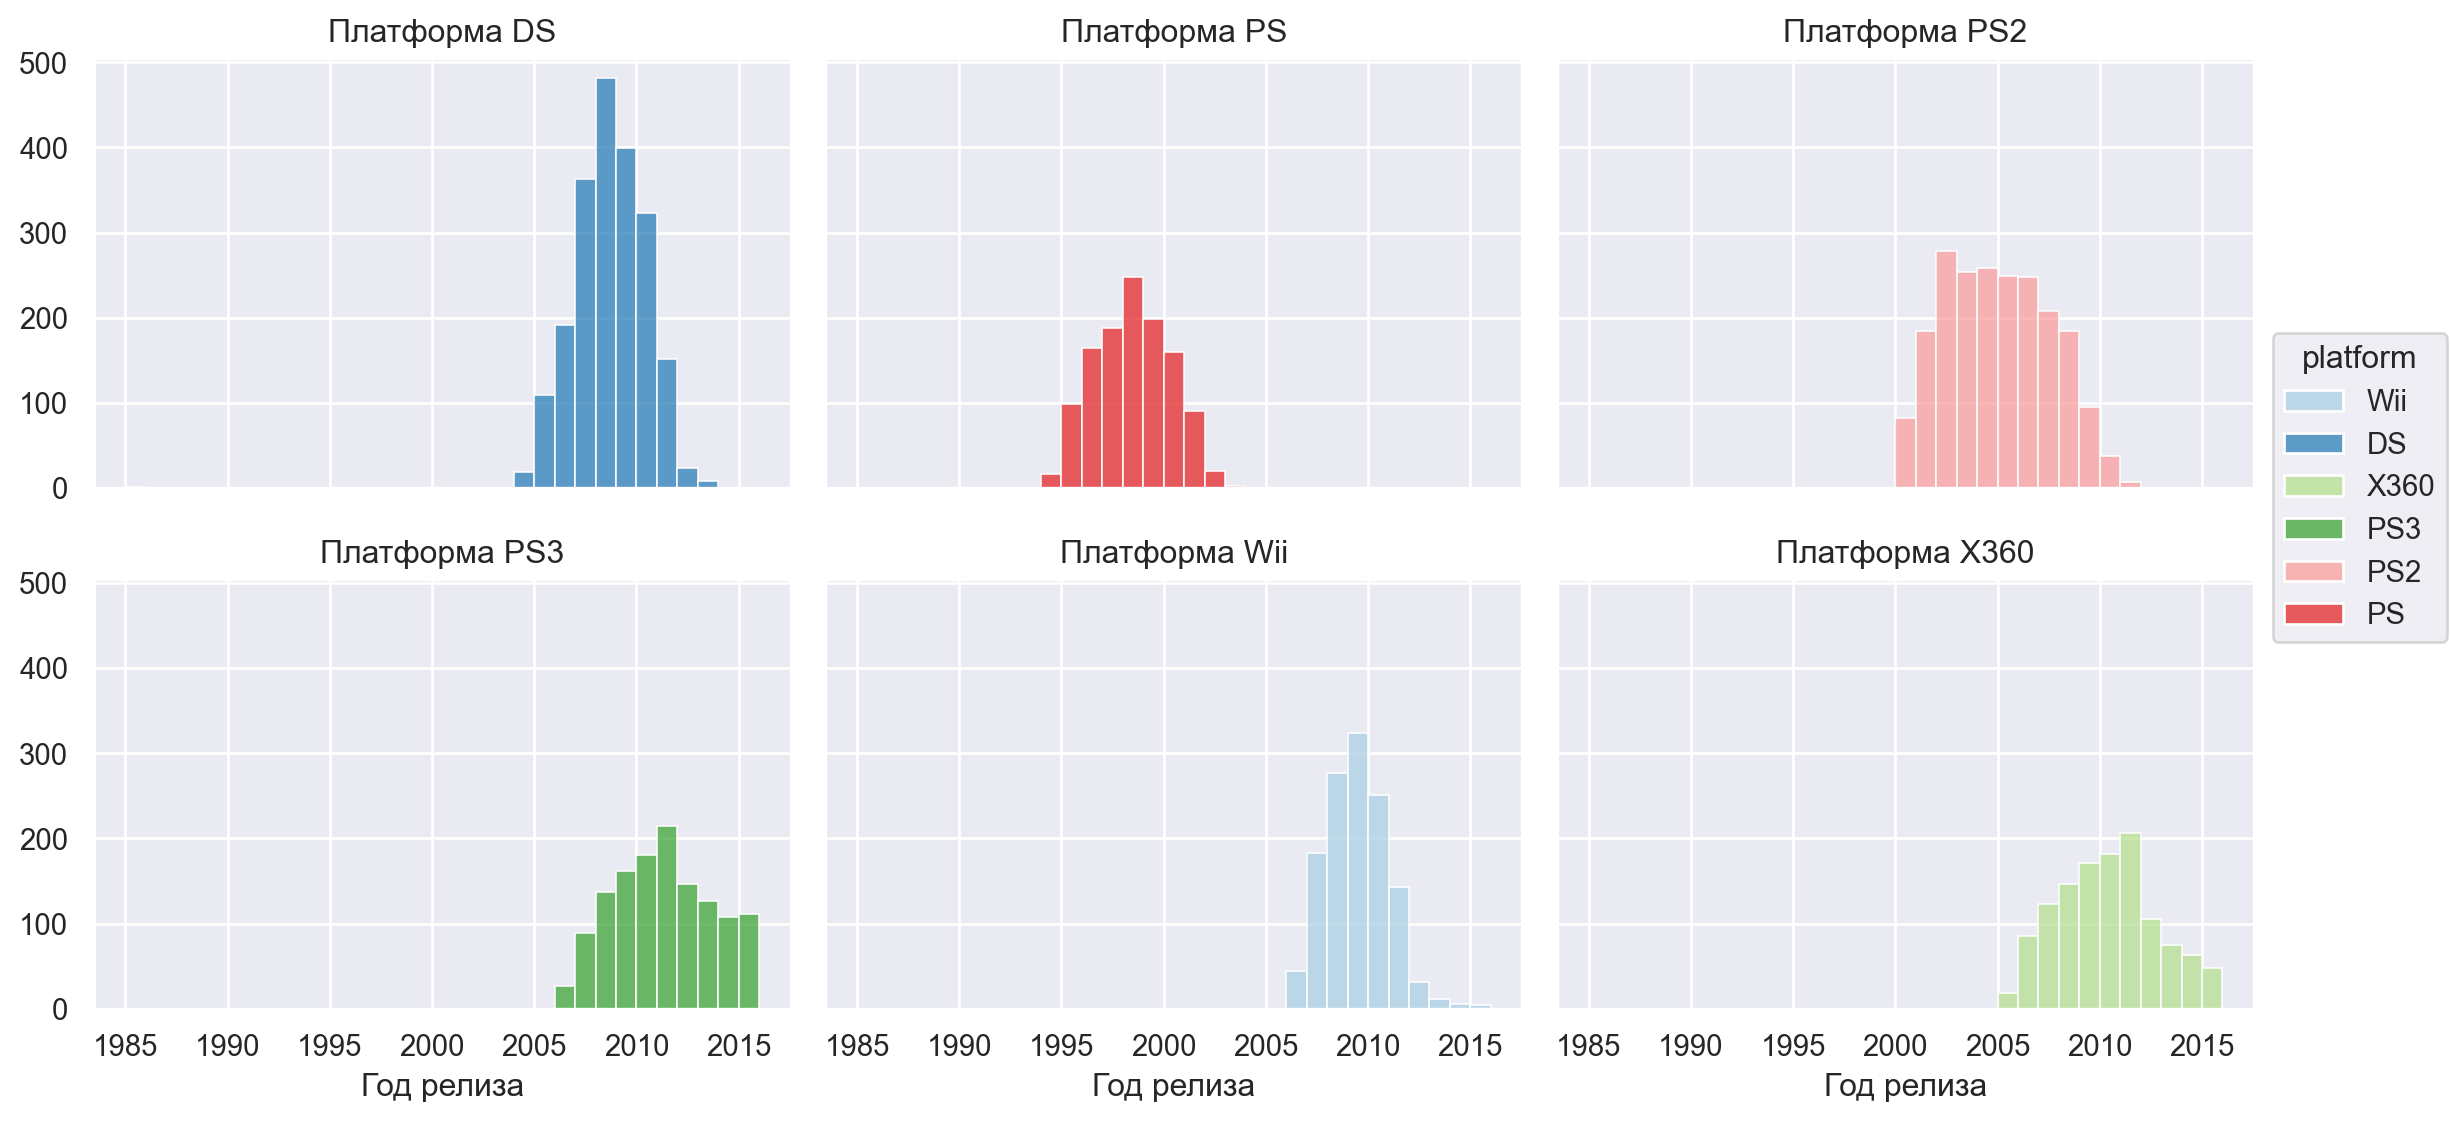

In [55]:
(
    so.Plot(
        data=df2,
        x='year',
        y='all_sales',
        color='platform',
    )
    .facet('platform', wrap=3)
    .add(so.Bars(), so.Hist(binwidth=1))
    .label(title='Платформа {}'.format, x='Год релиза', y='')
    .layout(size=(12, 6))
    .scale(color="Paired")
)

Каждая платформа выпускала свои игры 6 - 8 лет. Первое и второе поколение PS были вообще без конкурентов. Между 2 и 3 поколением PS на рынок вышла Nintendo со своими Wii и DS. Следом появилось следущее поколение PS3 и Xbox, которые по отдельности так и не смогли продать больше игр, чем PS2

Посмотрим на графики продаж по этим платформам.

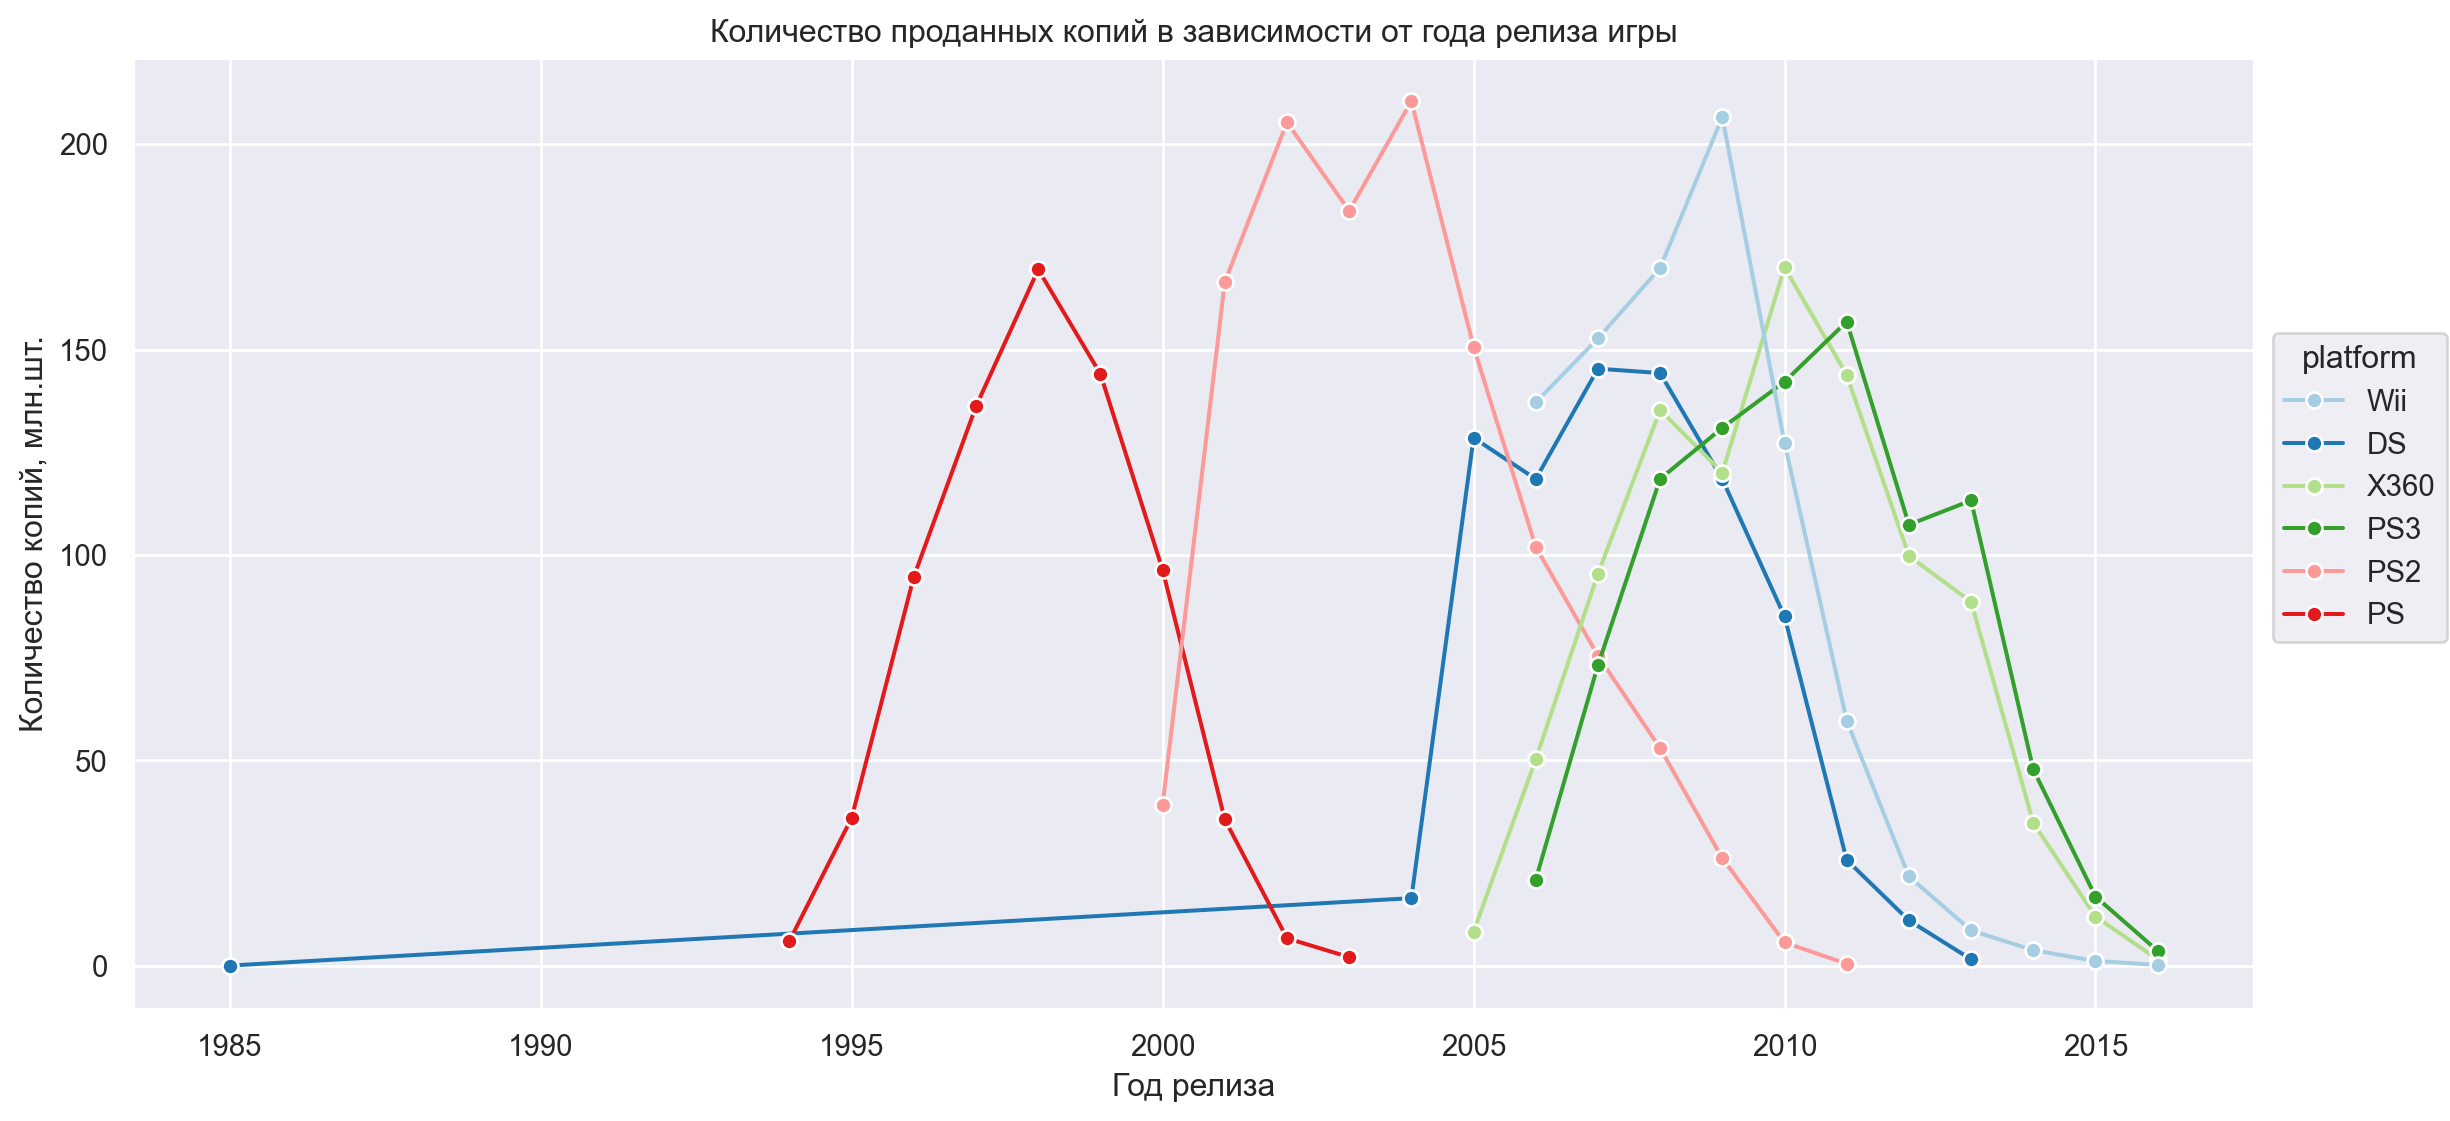

In [56]:
(
    so.Plot(
        data=df2,
        x='year',
        y='all_sales',
        color='platform',
    )
    .add(so.Line(marker="o", edgecolor="w"), so.Agg('sum'), linestyle=None)
    .label(title='Количество проданных копий в зависимости от года релиза игры', x='Год релиза', y='Количество копий, млн.шт.')
    .layout(size=(12, 6))
    .scale(color="Paired")
)

Для каждой платформы своё время. Как только начинают падать продажи игр, выходит новая приставка. Удачно вписалась Nintendo со своими Wii и DS между пиками популярности 2 и 3 поколения PS. А вот Xbox немного опоздала, и стала поэтому прямым конкурентом для PS3, полностью повторяя продажи игр.

Посмотрим на общий график продаж.

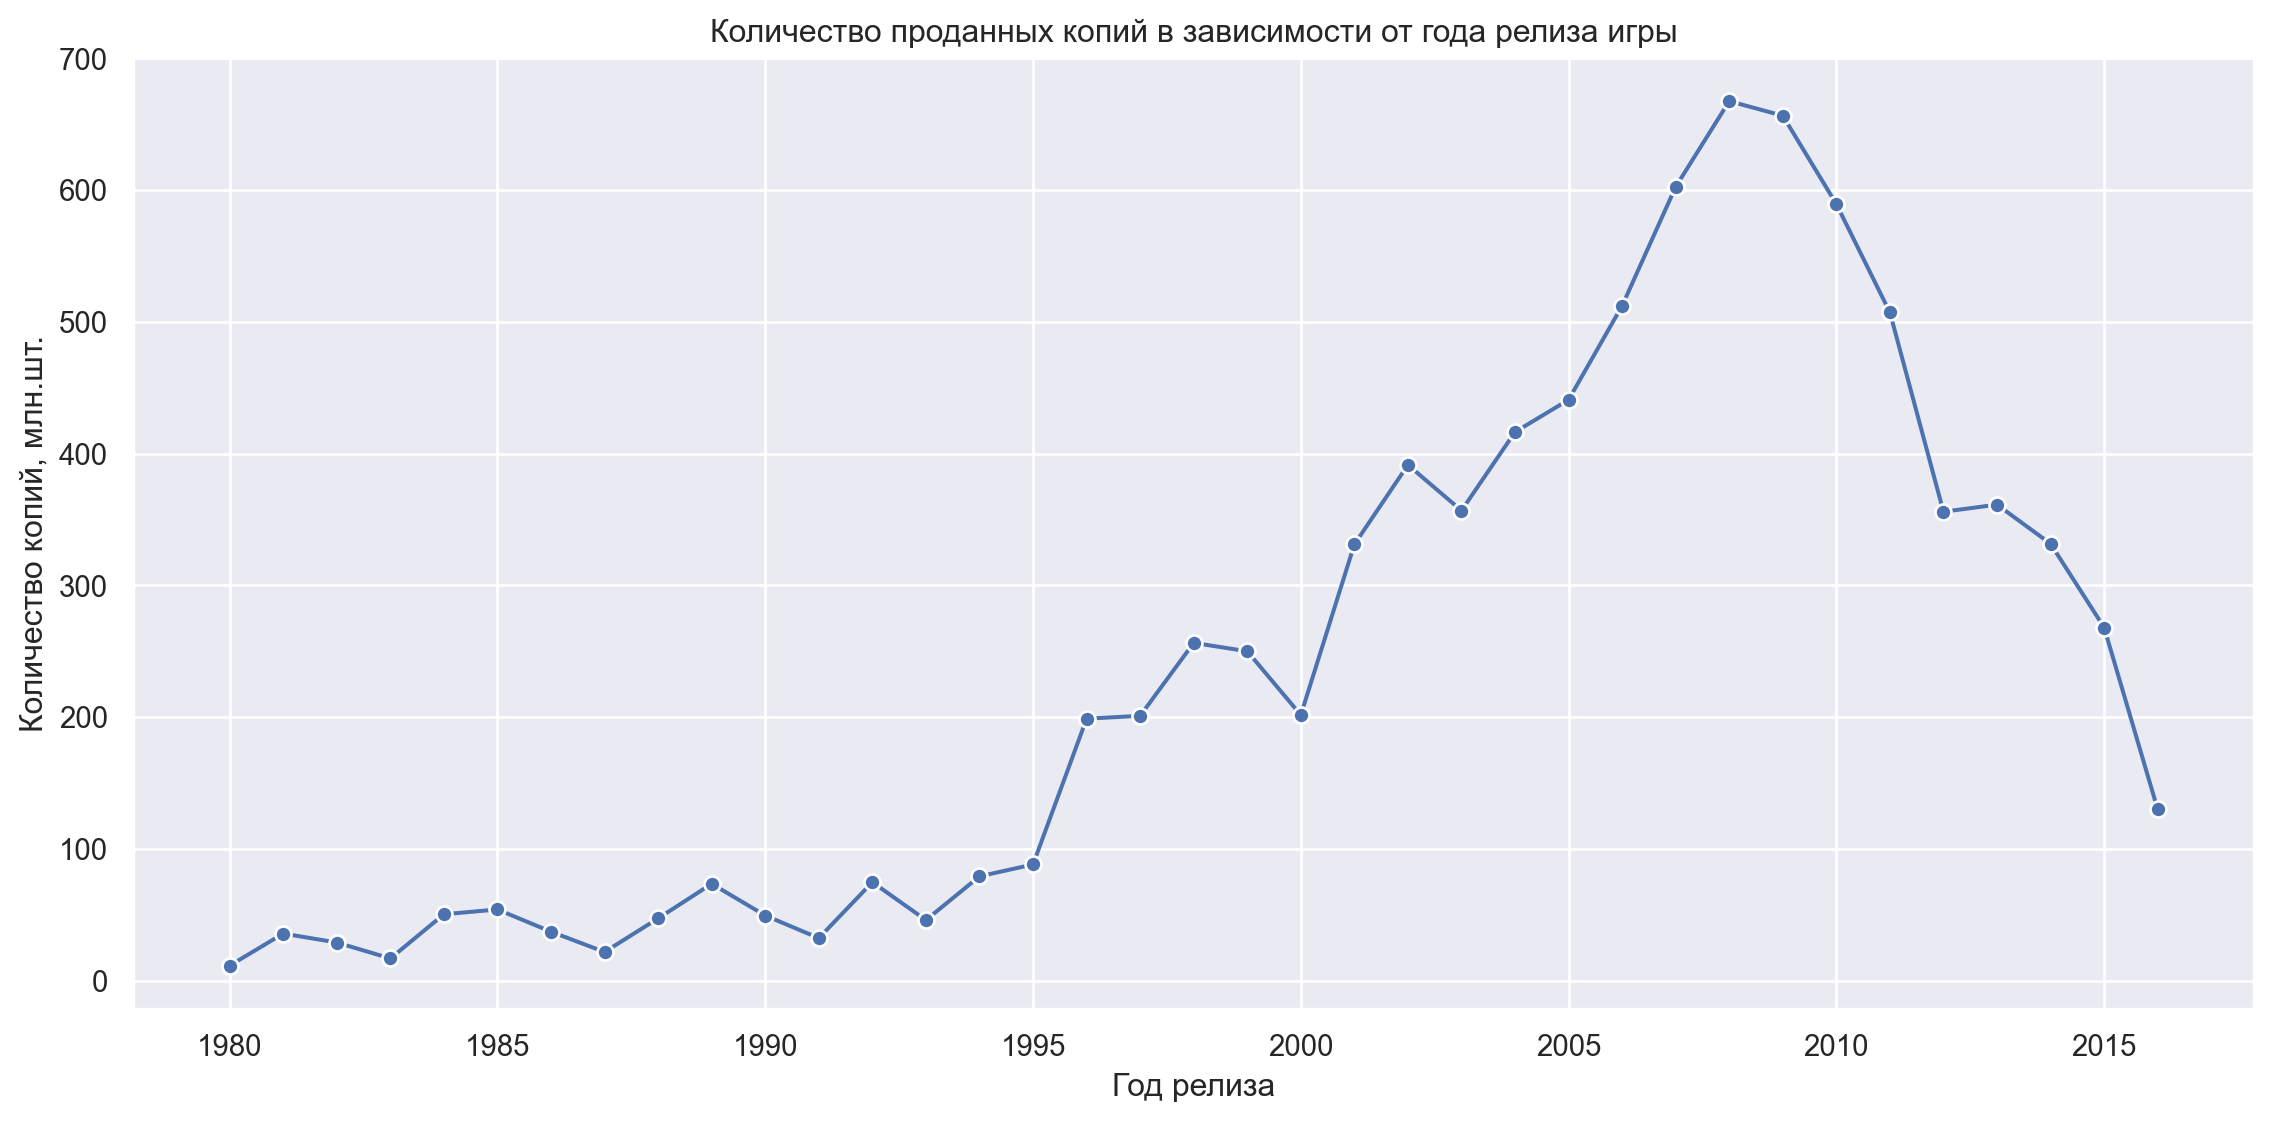

In [57]:
(
    so.Plot(
        data=df,
        x='year',
        y='all_sales',
        # color='platform',
    )
    .add(so.Line(marker="o", edgecolor="w"), so.Agg('sum'), linestyle=None)
    .label(title='Количество проданных копий в зависимости от года релиза игры', x='Год релиза', y='Количество копий, млн.шт.')
    .layout(size=(12, 6))
    .scale(x=so.Continuous().tick(every=5))
)

Пик продаж всех игр приходится на 2008 год - время популярности 4 лучших платформ. А началось всё в 1995, пошло резкое увеличение объема продаж. А в последние годы рынок охладел к играм, и уровень продаж стримится к истокам.<br>
Для дальнейших прогнозов по продажам возьму данные с 2012 года. Как раз туда не попадёт отжившая своё платформа PS2

In [58]:
df_12 = df.query('year > 2012').copy()

In [59]:
df_12['platform'] = df_12['platform'].cat.remove_unused_categories()
df_12['rating'] = df_12['rating'].cat.remove_unused_categories()

Посмотрим еще раз на график продаж за последнее время выделяя разные платформы.

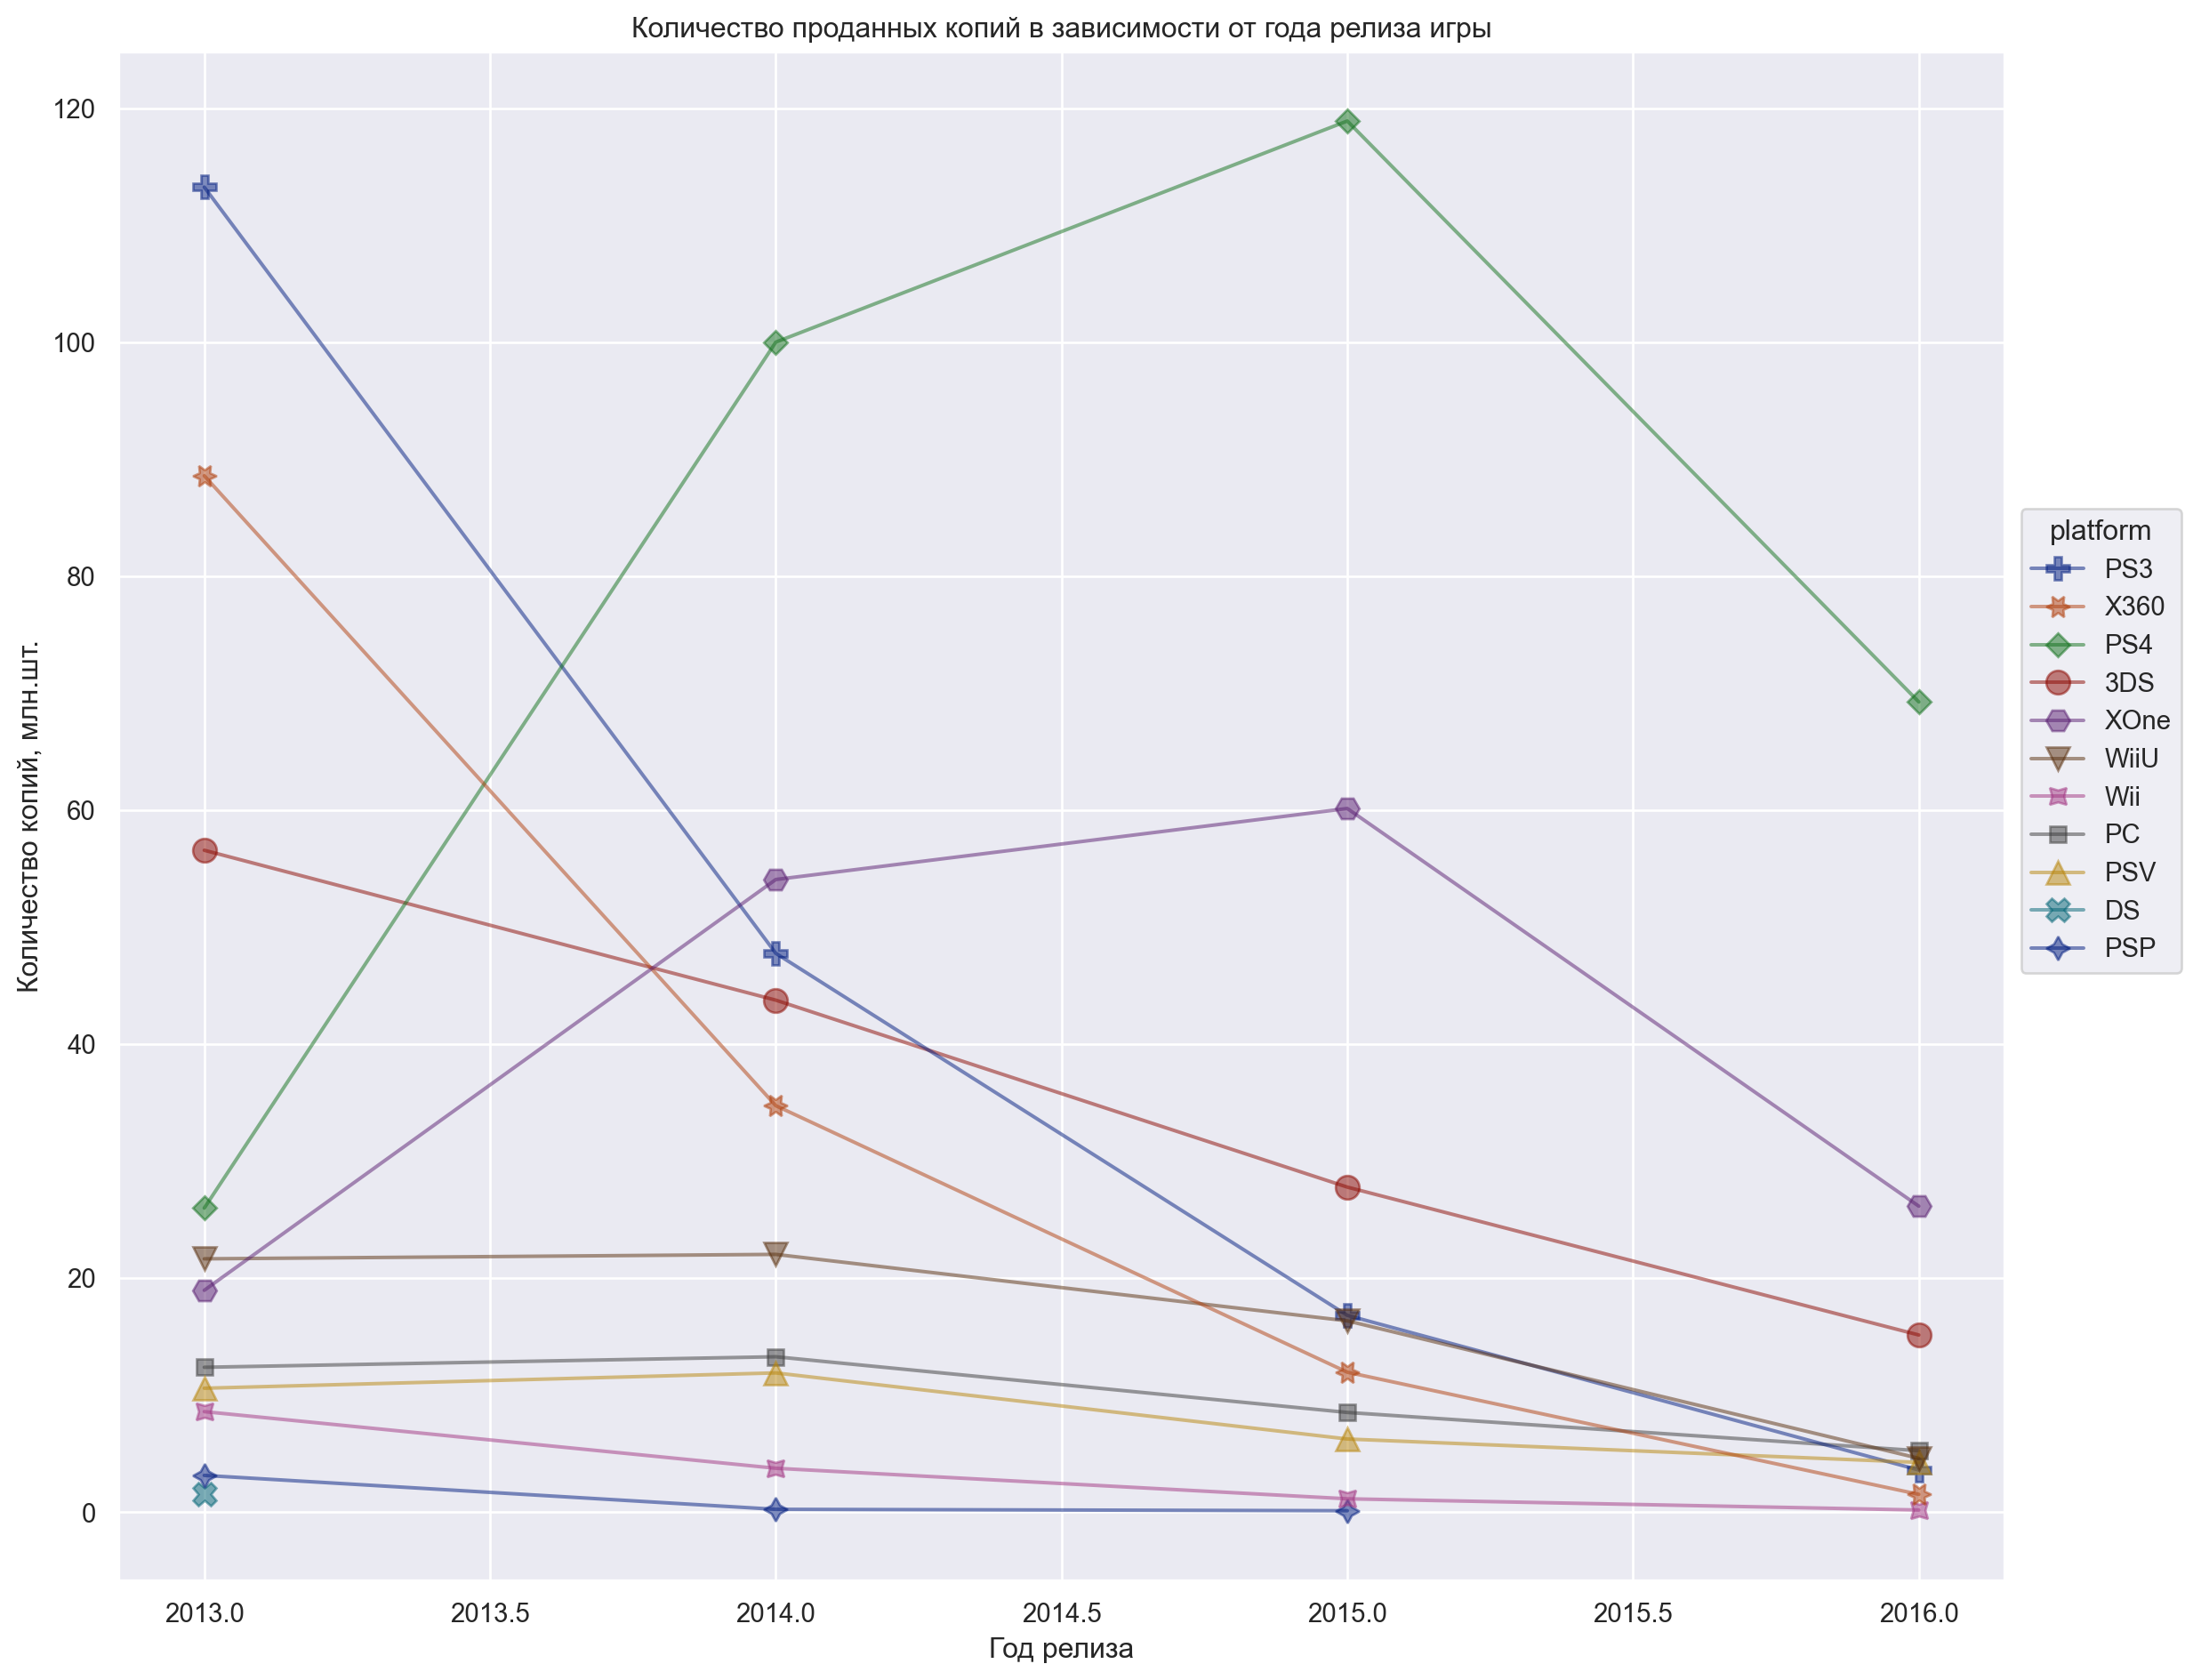

In [60]:
(
    so.Plot(
        data=df_12,
        x='year',
        y='all_sales',
        color='platform',
    )
    .add(so.Line(pointsize=10, alpha=0.5), so.Agg('sum'), marker='platform')
    .label(title='Количество проданных копий в зависимости от года релиза игры', x='Год релиза', y='Количество копий, млн.шт.')
    .layout(size=(12, 10))
    .scale(color="dark")
    # .scale(x=so.Continuous().tick(every=5))
)

Популярные PS4 и XOne. Учитывая что датасет неполный за последний год, можно ожидать некоторого роста продаж по этим плтформам. Остальные платформы вышли из моды, и приближают свои продажи к нулевому уровню.

### Ящик с усами по всем платфоромам

Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам.

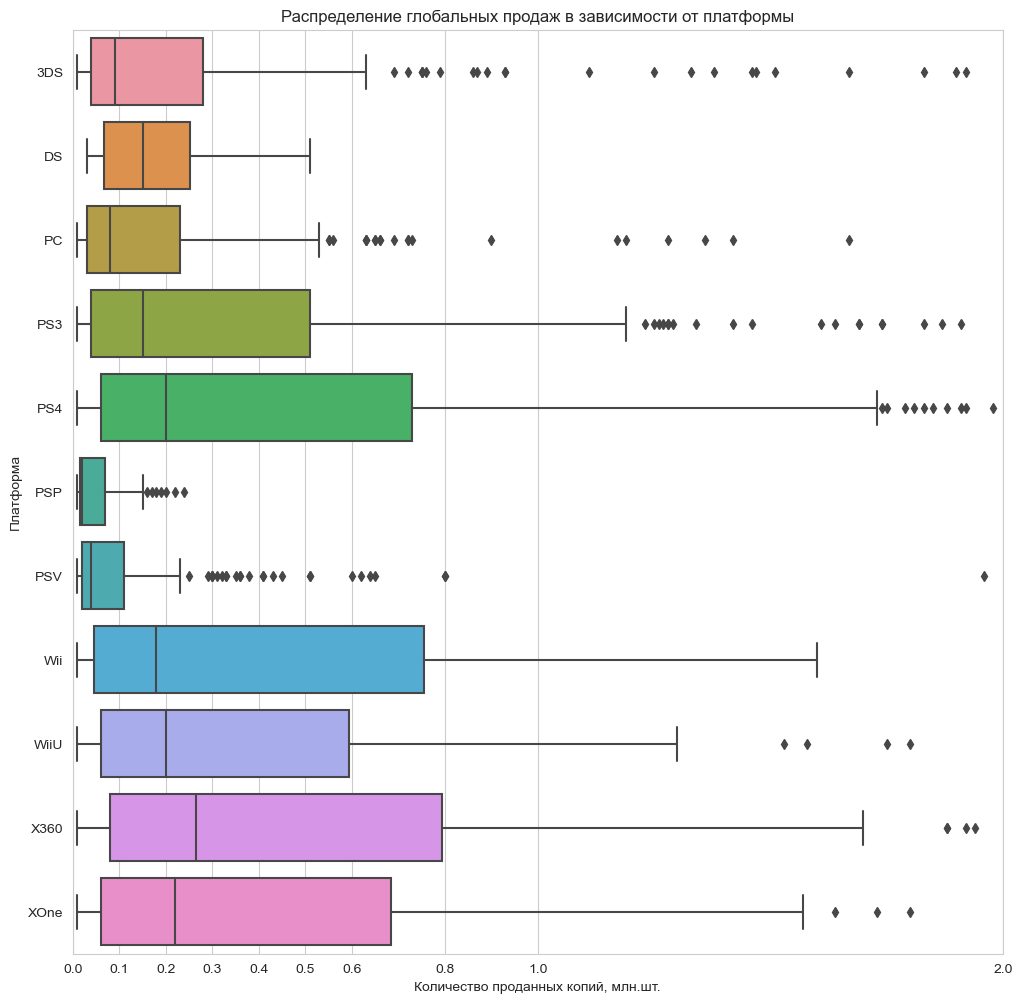

In [61]:
plt.figure(figsize=(12, 12))
box = sns.boxplot(data=df_12, x='all_sales', y='platform')
box.set(
    title='Распределение глобальных продаж в зависимости от платформы',
    xlabel="Количество проданных копий, млн.шт.",
    ylabel="Платформа",
    xlim=[0, 2],
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 2]
)
plt.show()

В последние 4 года хорошие продажи имеют PS3, PS4, Wii, WiiU, X360 и XOne в среднем на уровне 200 тыс. копий.

### Продажи внутри одной платформы

Посмотрим на продажи внутри PS3 в зависимости от оценок пользователей.

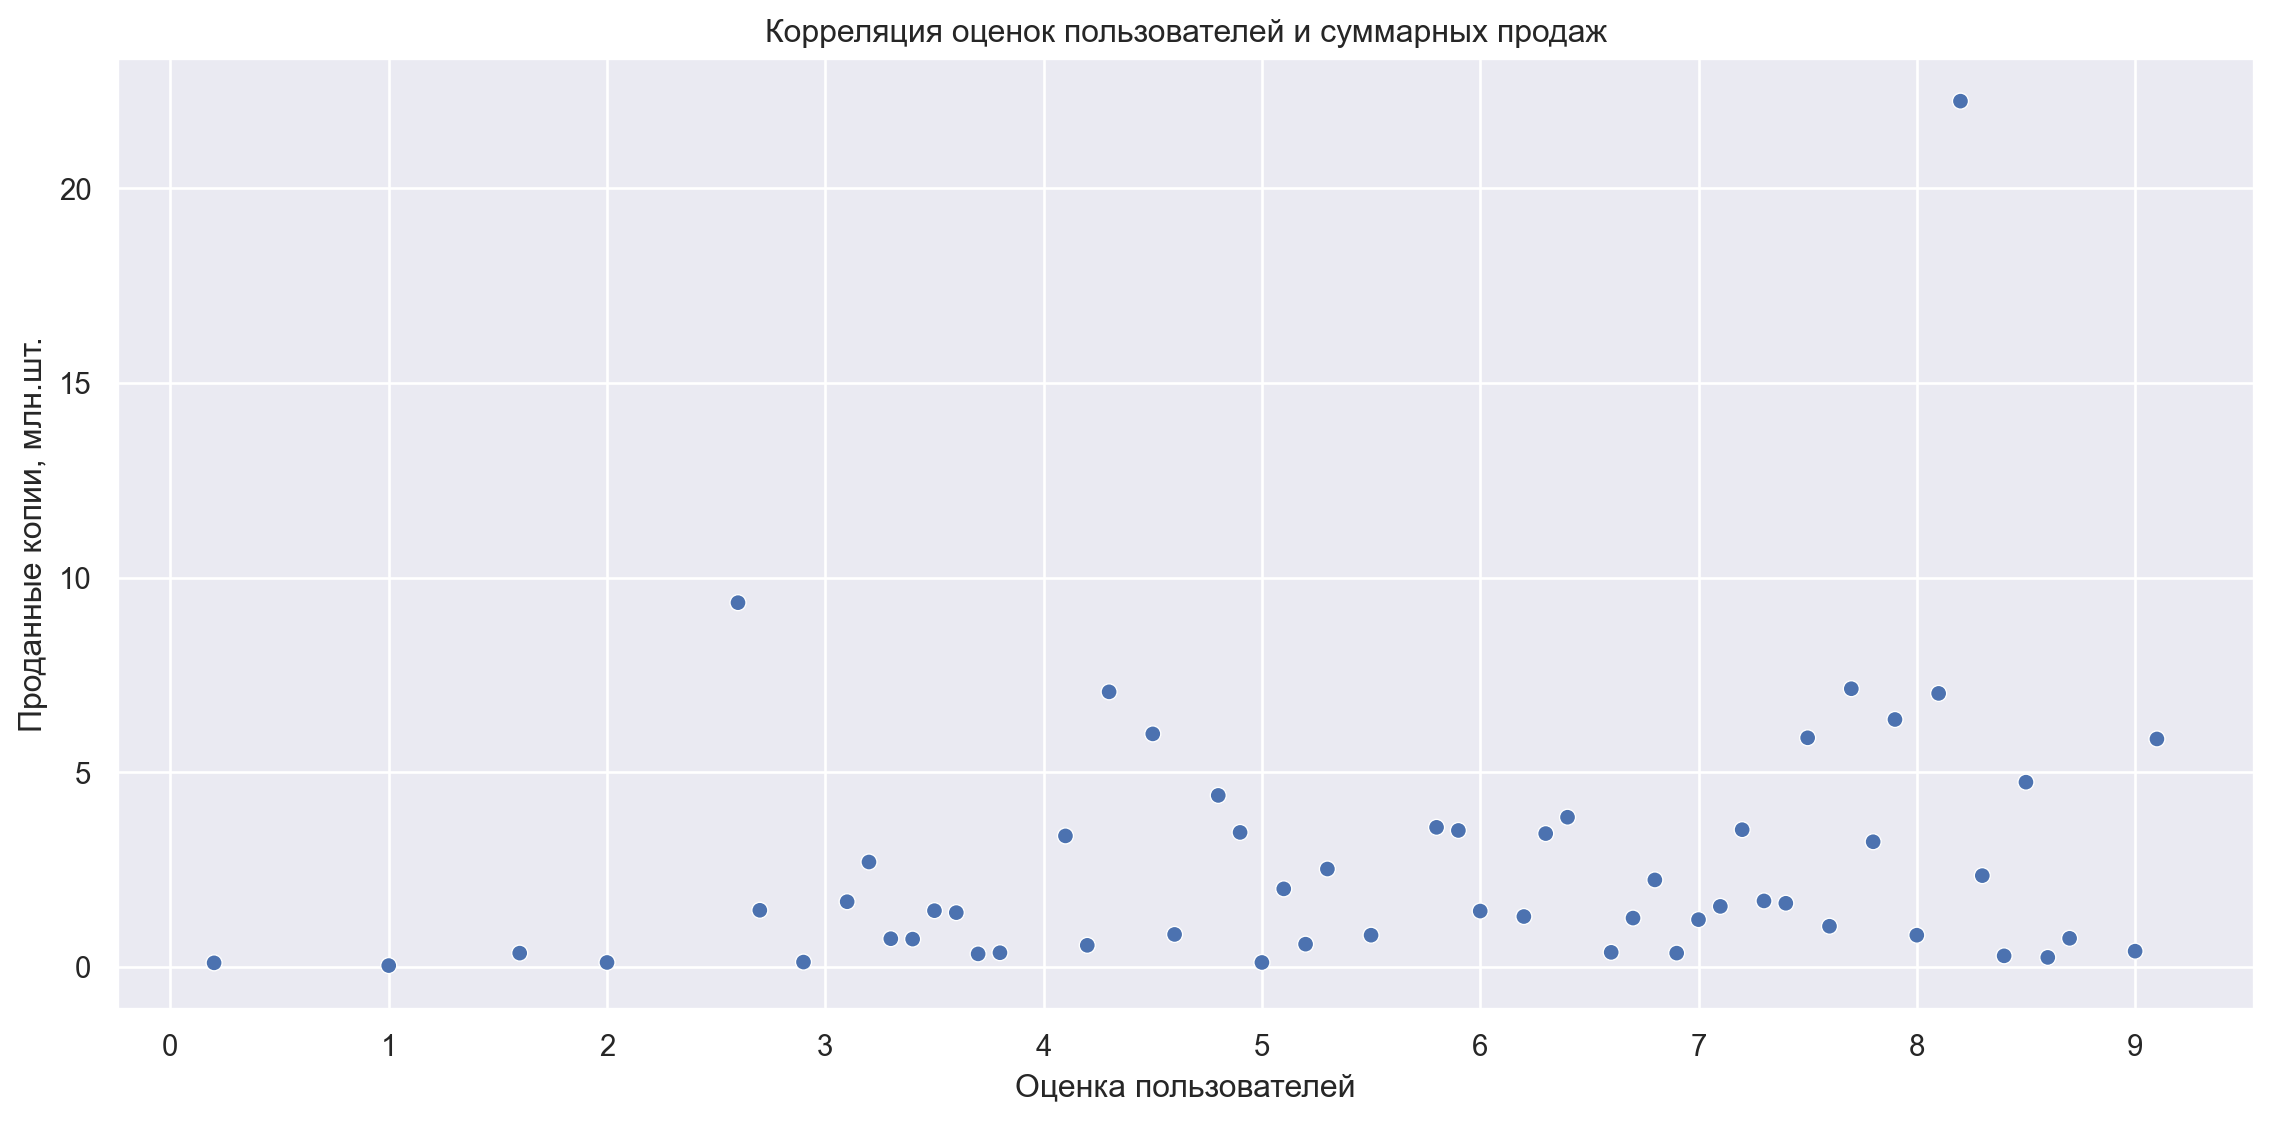

In [62]:
(
    so.Plot(
        data=df_12.query('platform == "PS3"'),
        x='user_score',
        y='all_sales',
        # color='rating',
    )
    .add(so.Dot(edgecolor="w"), so.Agg('sum'))
    .label(title='Корреляция оценок пользователей и суммарных продаж', x='Оценка пользователей', y='Проданные копии, млн.шт.')
    .layout(size=(12, 6))
    .scale(x=so.Continuous().tick(every=1))
    # .limit(y=(0, 100))
)

Зная, как "ненормально" распределены значения оценок пользователей, построим более наглядный график с округленными значениями и суммарнеыми продажами.

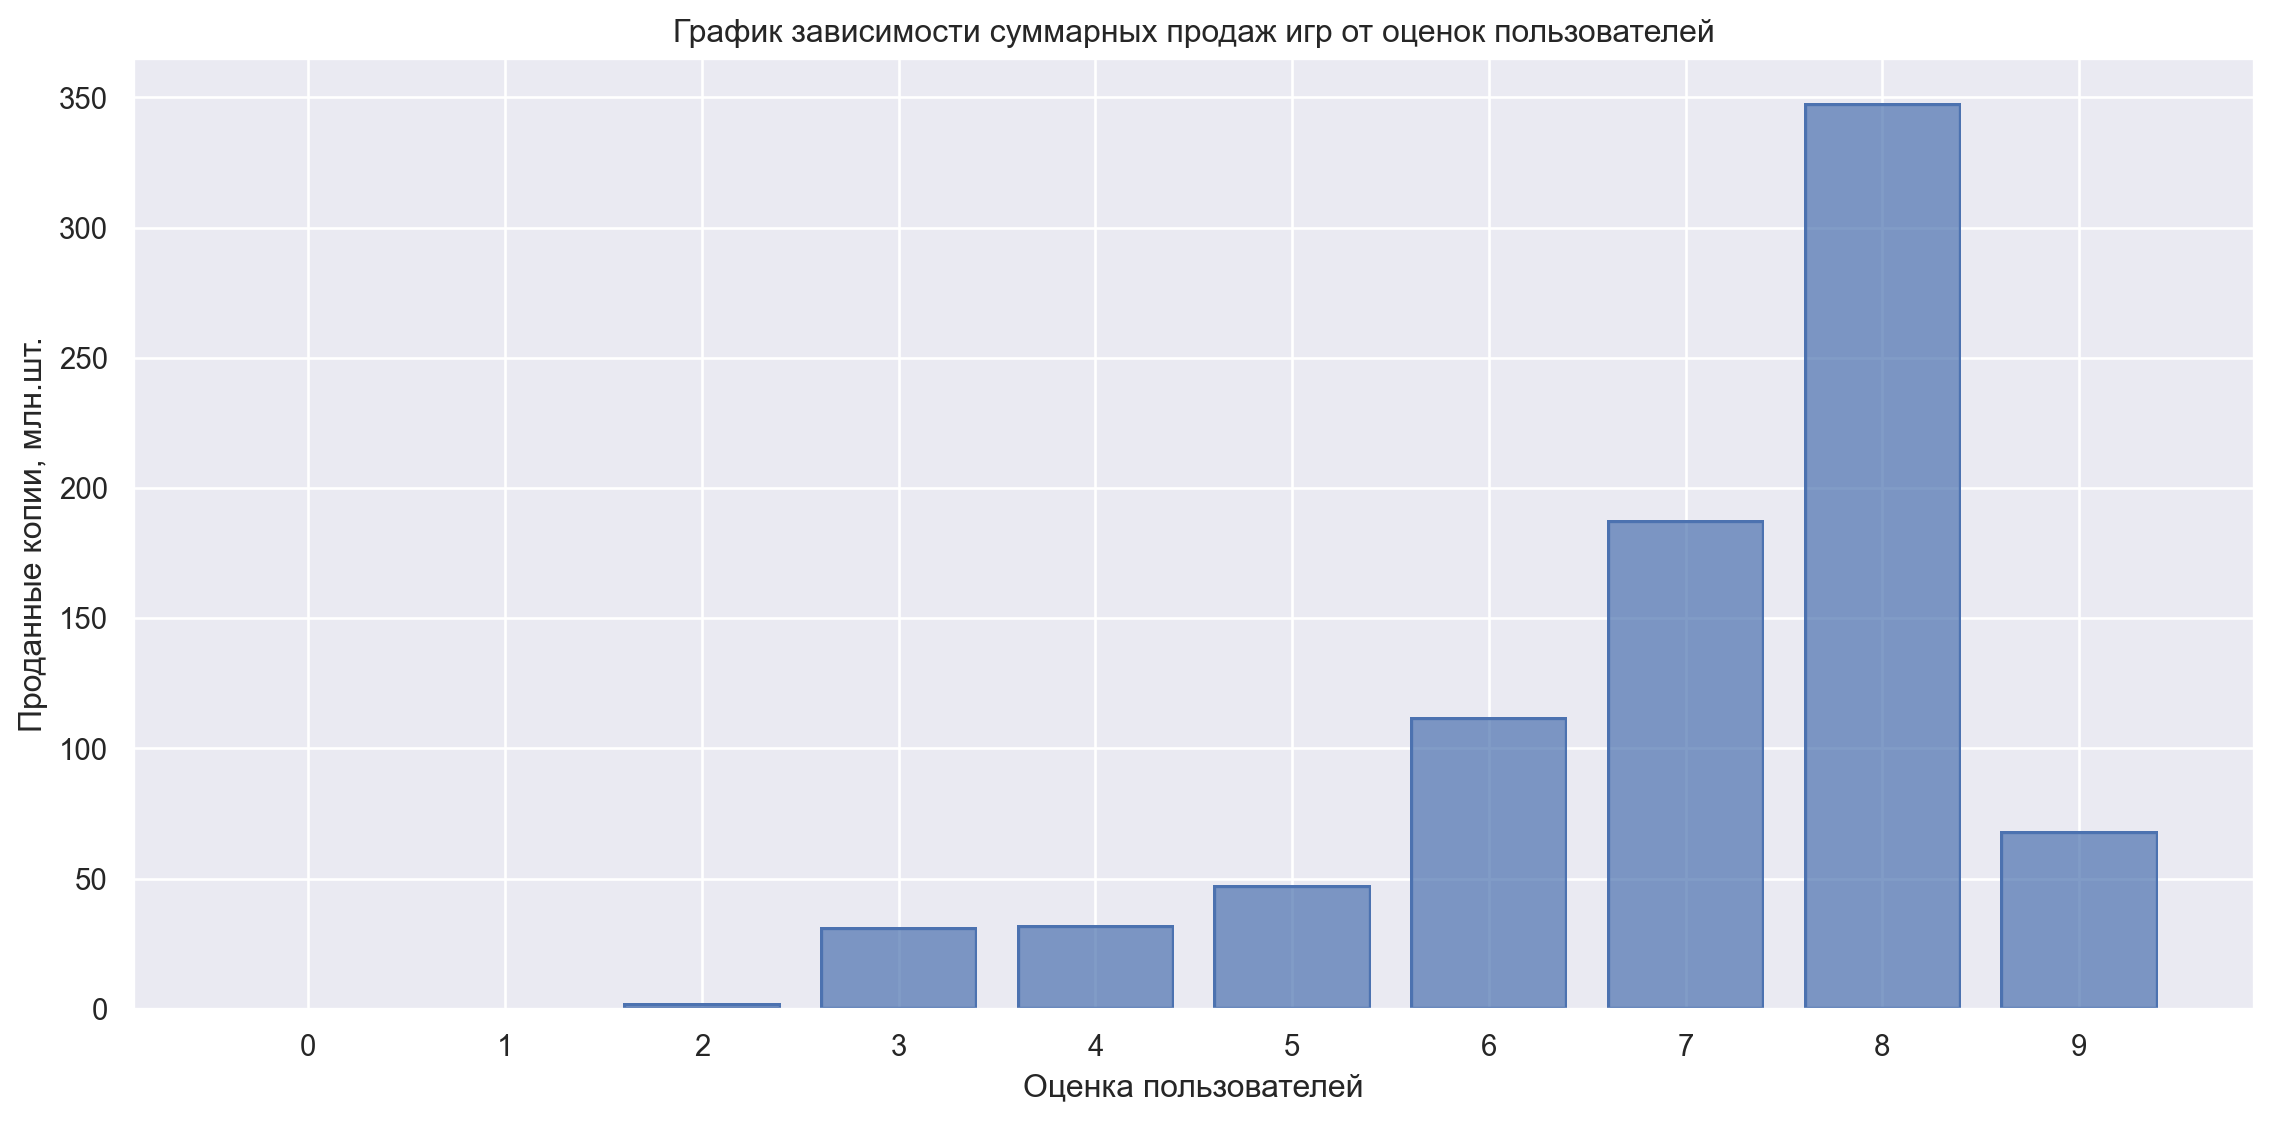

In [63]:
(
    so.Plot(
        data=df.query('platform == "PS3"'),
        x='user_score',
        y='all_sales',
    )
    .add(so.Bar(), so.Agg('sum'), x=df['user_score'].round())
    .label(title='График зависимости суммарных продаж игр от оценок пользователей', x='Оценка пользователей', y='Проданные копии, млн.шт.')
    .layout(size=(12, 6))
    .scale(x=so.Continuous().tick(every=1))
    # .limit(y=(0, 100))
)

Чем больше оценка пользователей, тем больше продаж. Но есть предел в оценках. Как уже было сказано, пользователи редко ставят оценку 9 и выше, поэтому уровень продаж небольшой. Посчитаем корреляцию.

In [64]:
df['all_sales'].corr(df['user_score'])

0.08784637143951961

Значение корреляции небольшое потому, что зависимость нелинейная.

Построим такой же график для оценок критиков.

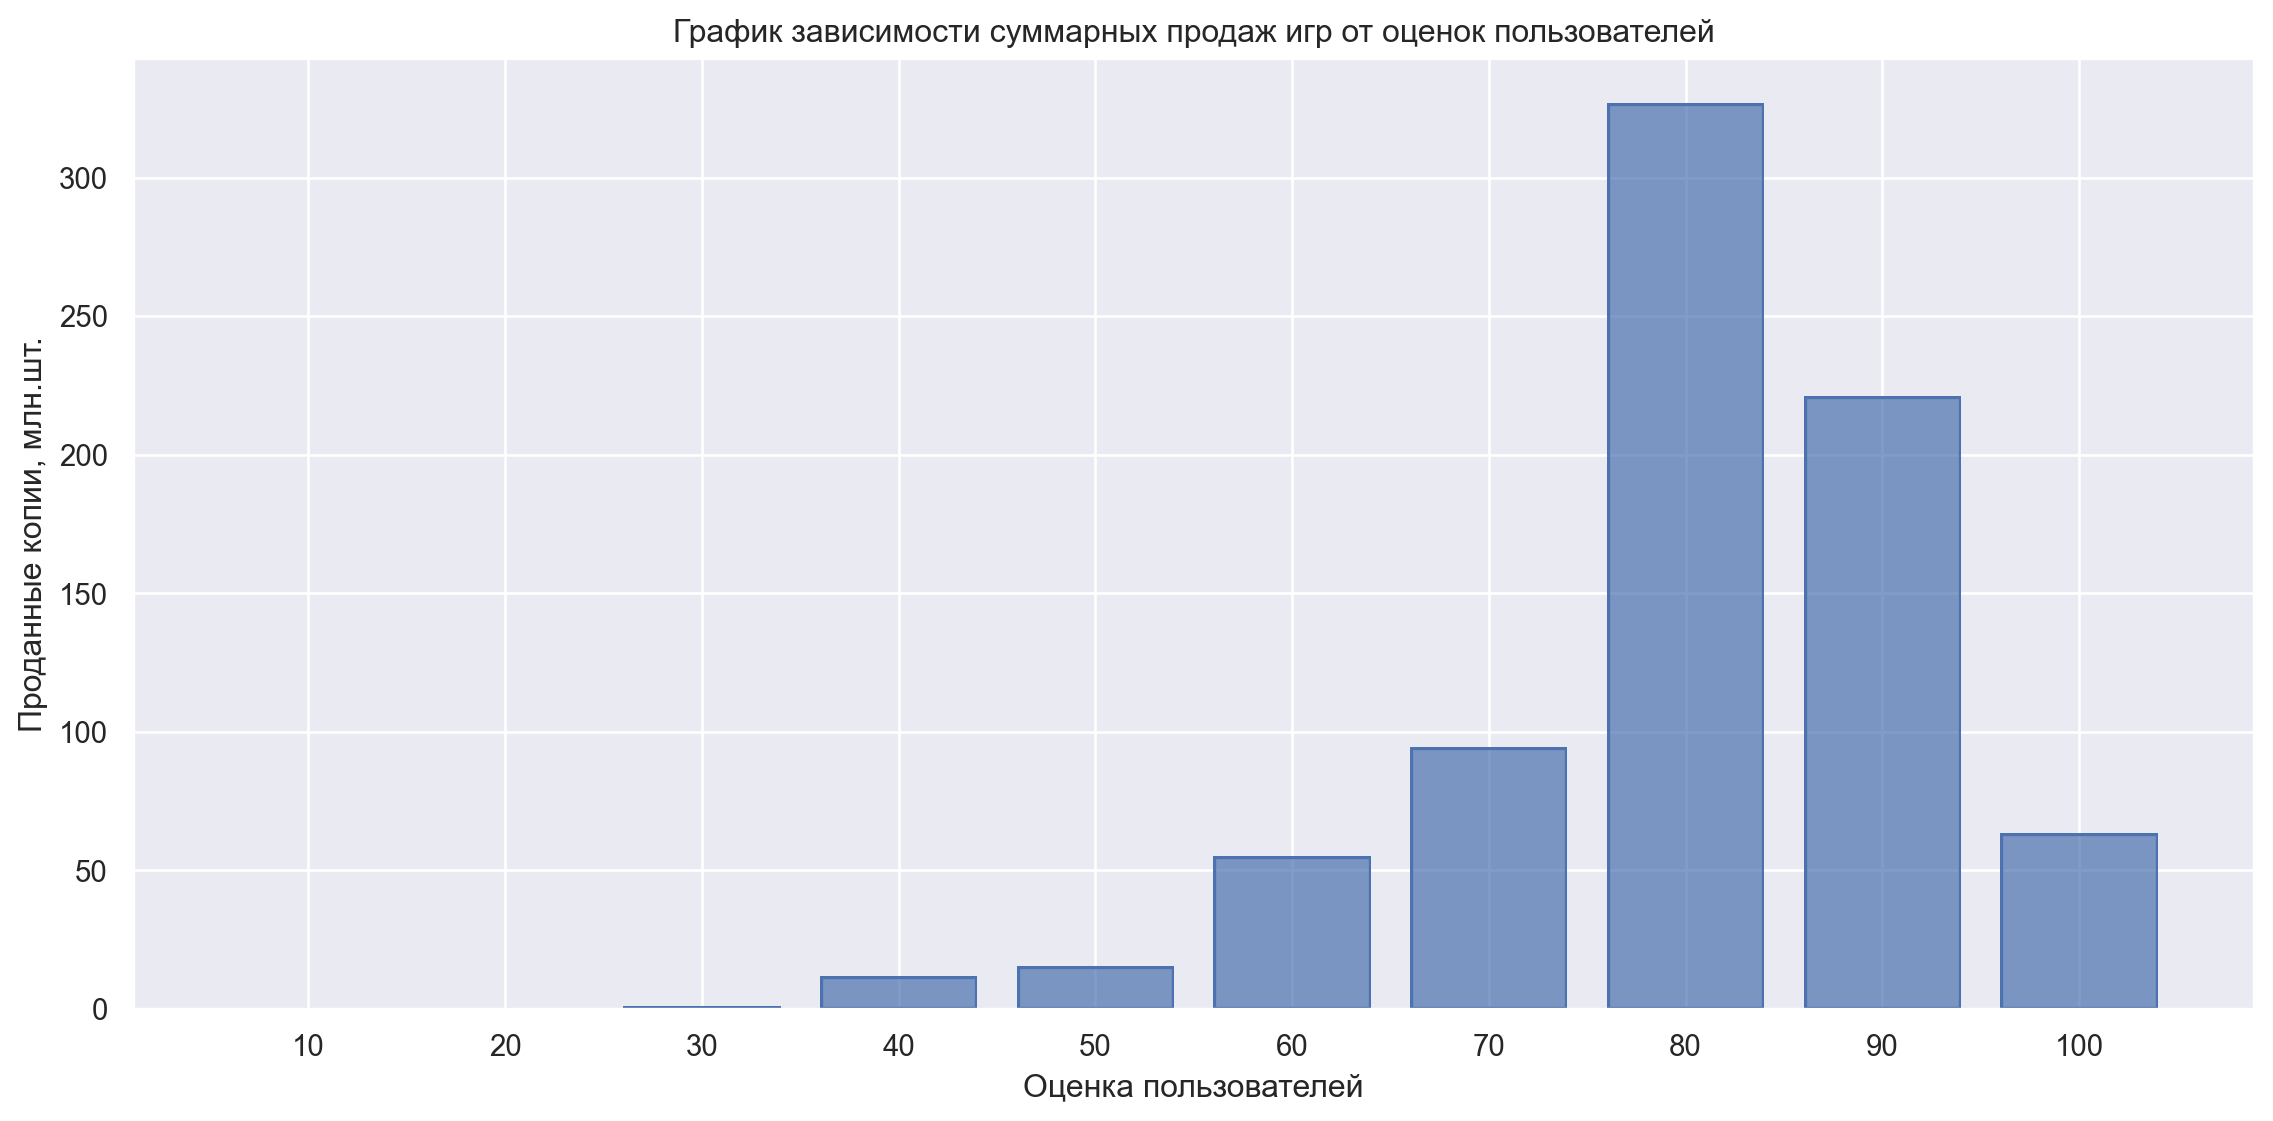

In [65]:
(
    so.Plot(
        data=df.query('platform == "PS3"'),
        x='critic_score',
        y='all_sales',
    )
    .add(so.Bar(), so.Agg('sum'), x=df['critic_score'].round(-1))
    .label(title='График зависимости суммарных продаж игр от оценок пользователей', x='Оценка пользователей', y='Проданные копии, млн.шт.')
    .layout(size=(12, 6))
    .scale(x=so.Continuous().tick(every=10))
    # .limit(y=(0, 100))
)

Видим примерно такую же картину. Но критики чаще ставят более высоку оценку, чем пользователи. Пик суммарных продаж остается на том же уровне - 80 для критиков, 8 - для пользователей.

### Продажи внутри разных платформ

Построим подобные графики для нескольких популярных платформ.

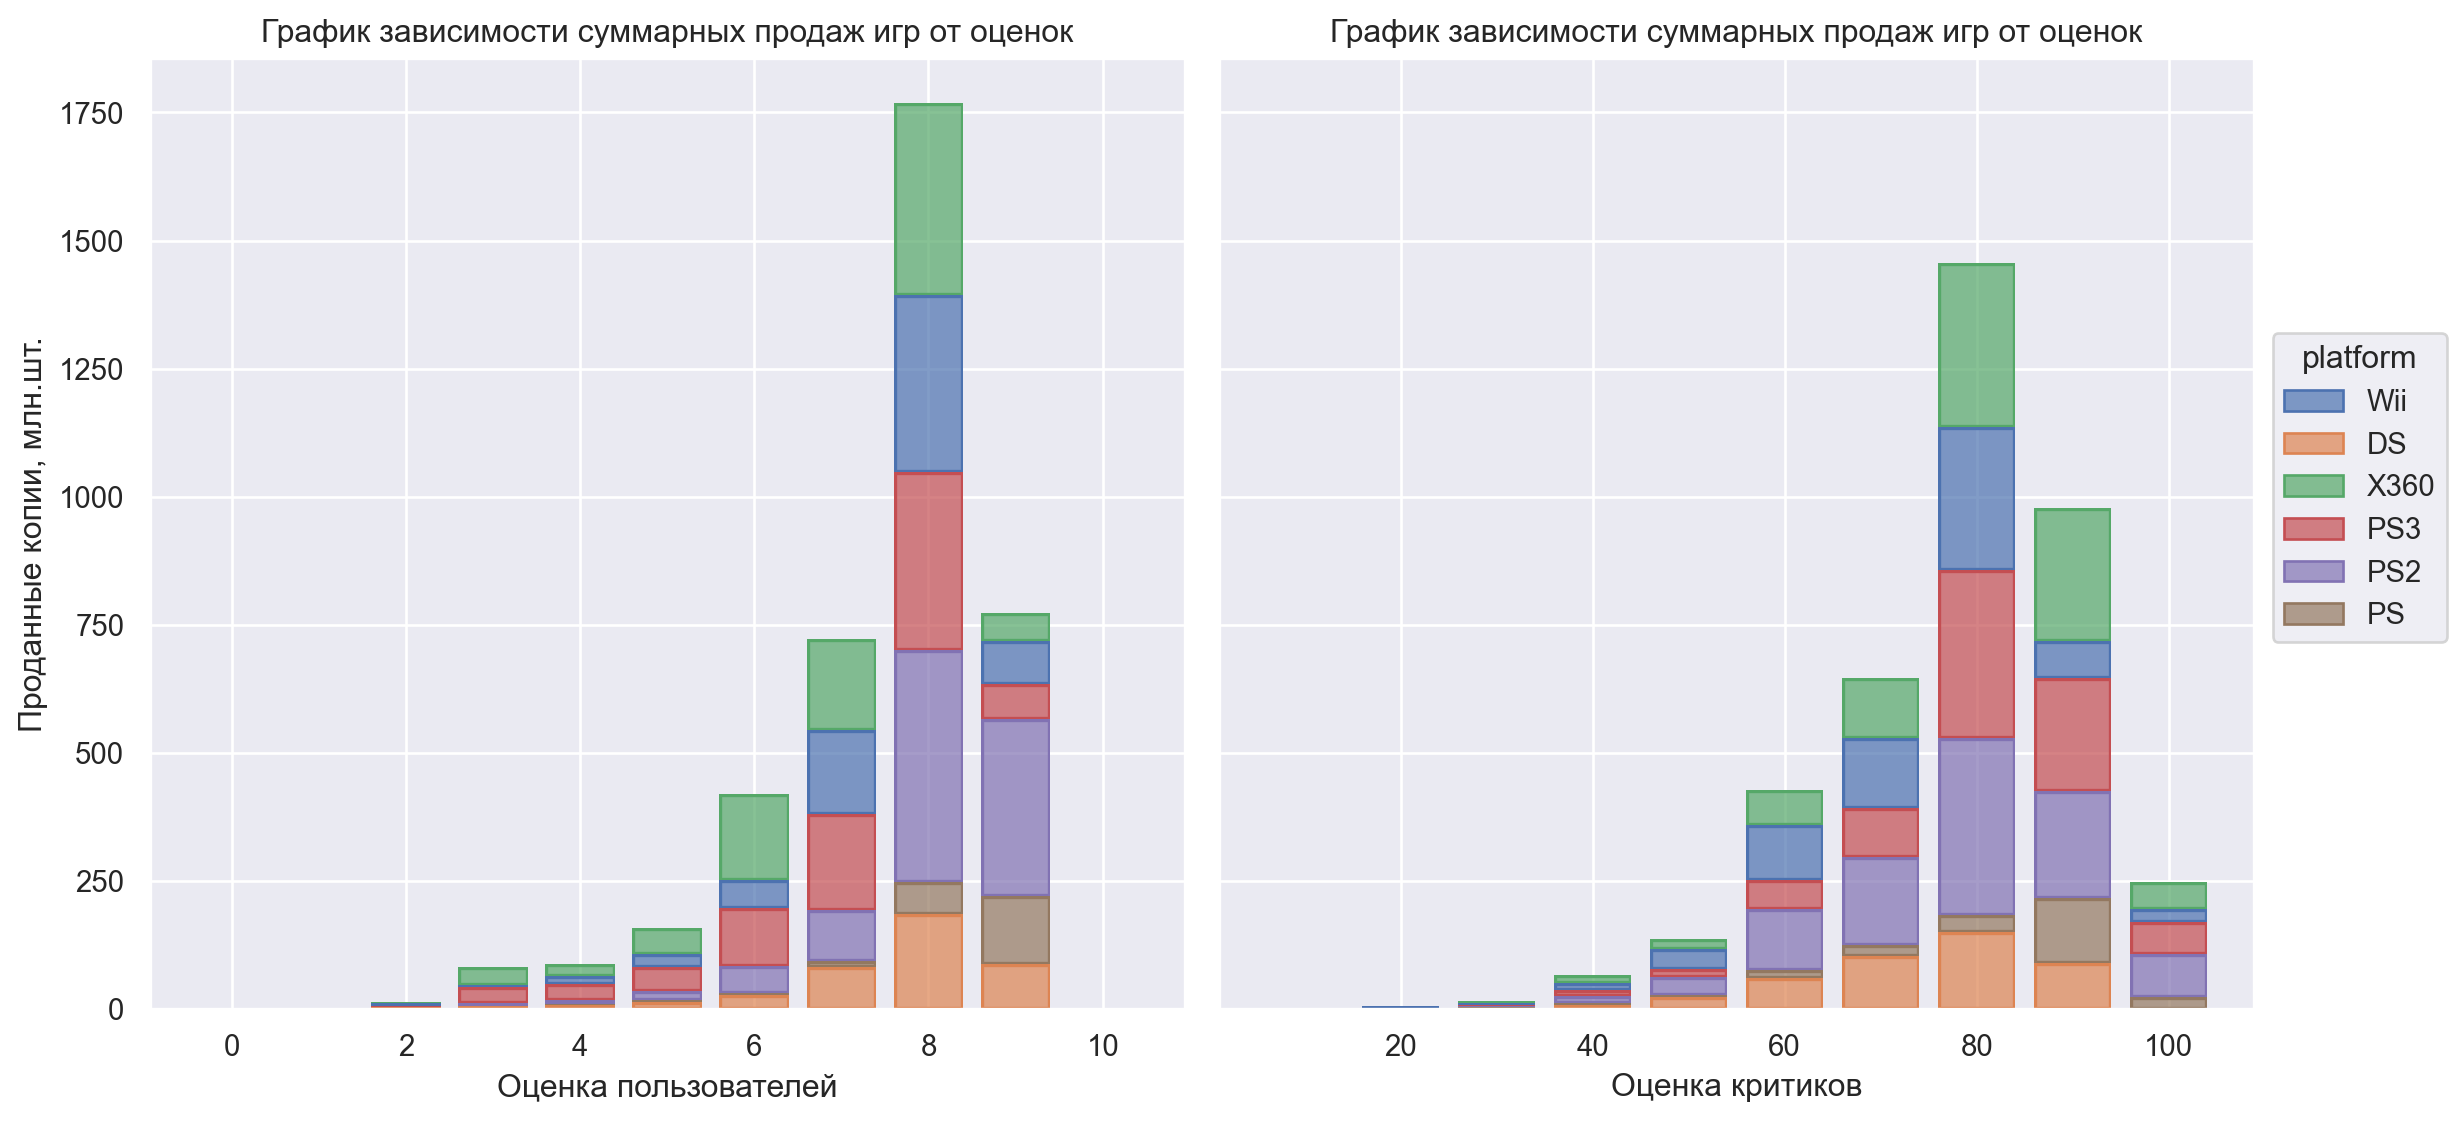

In [66]:
(
    so.Plot(
        data=df.query("platform in ['PS', 'PS2', 'PS3', 'X360', 'Wii', 'DS']"),
        # x='critic_score',
        # y='all_sales',
        color='platform'
    )
    .pair(x=[df['user_score'].round(), df['critic_score'].round(-1)], y=['all_sales'])
    .add(so.Bar(), so.Agg('sum'), so.Stack())
    .label(title='График зависимости суммарных продаж игр от оценок')
    .label(x0="Оценка пользователей", x1="Оценка критиков", y0="Проданные копии, млн.шт.")
    .layout(size=(12, 6))
)

Видим одинаковые картинки для разных платформ, что подтверждает закономерность.

### Продажи по жанрам

Посмотрим медианные продажи в зависимости от жанра игры за последние годы.

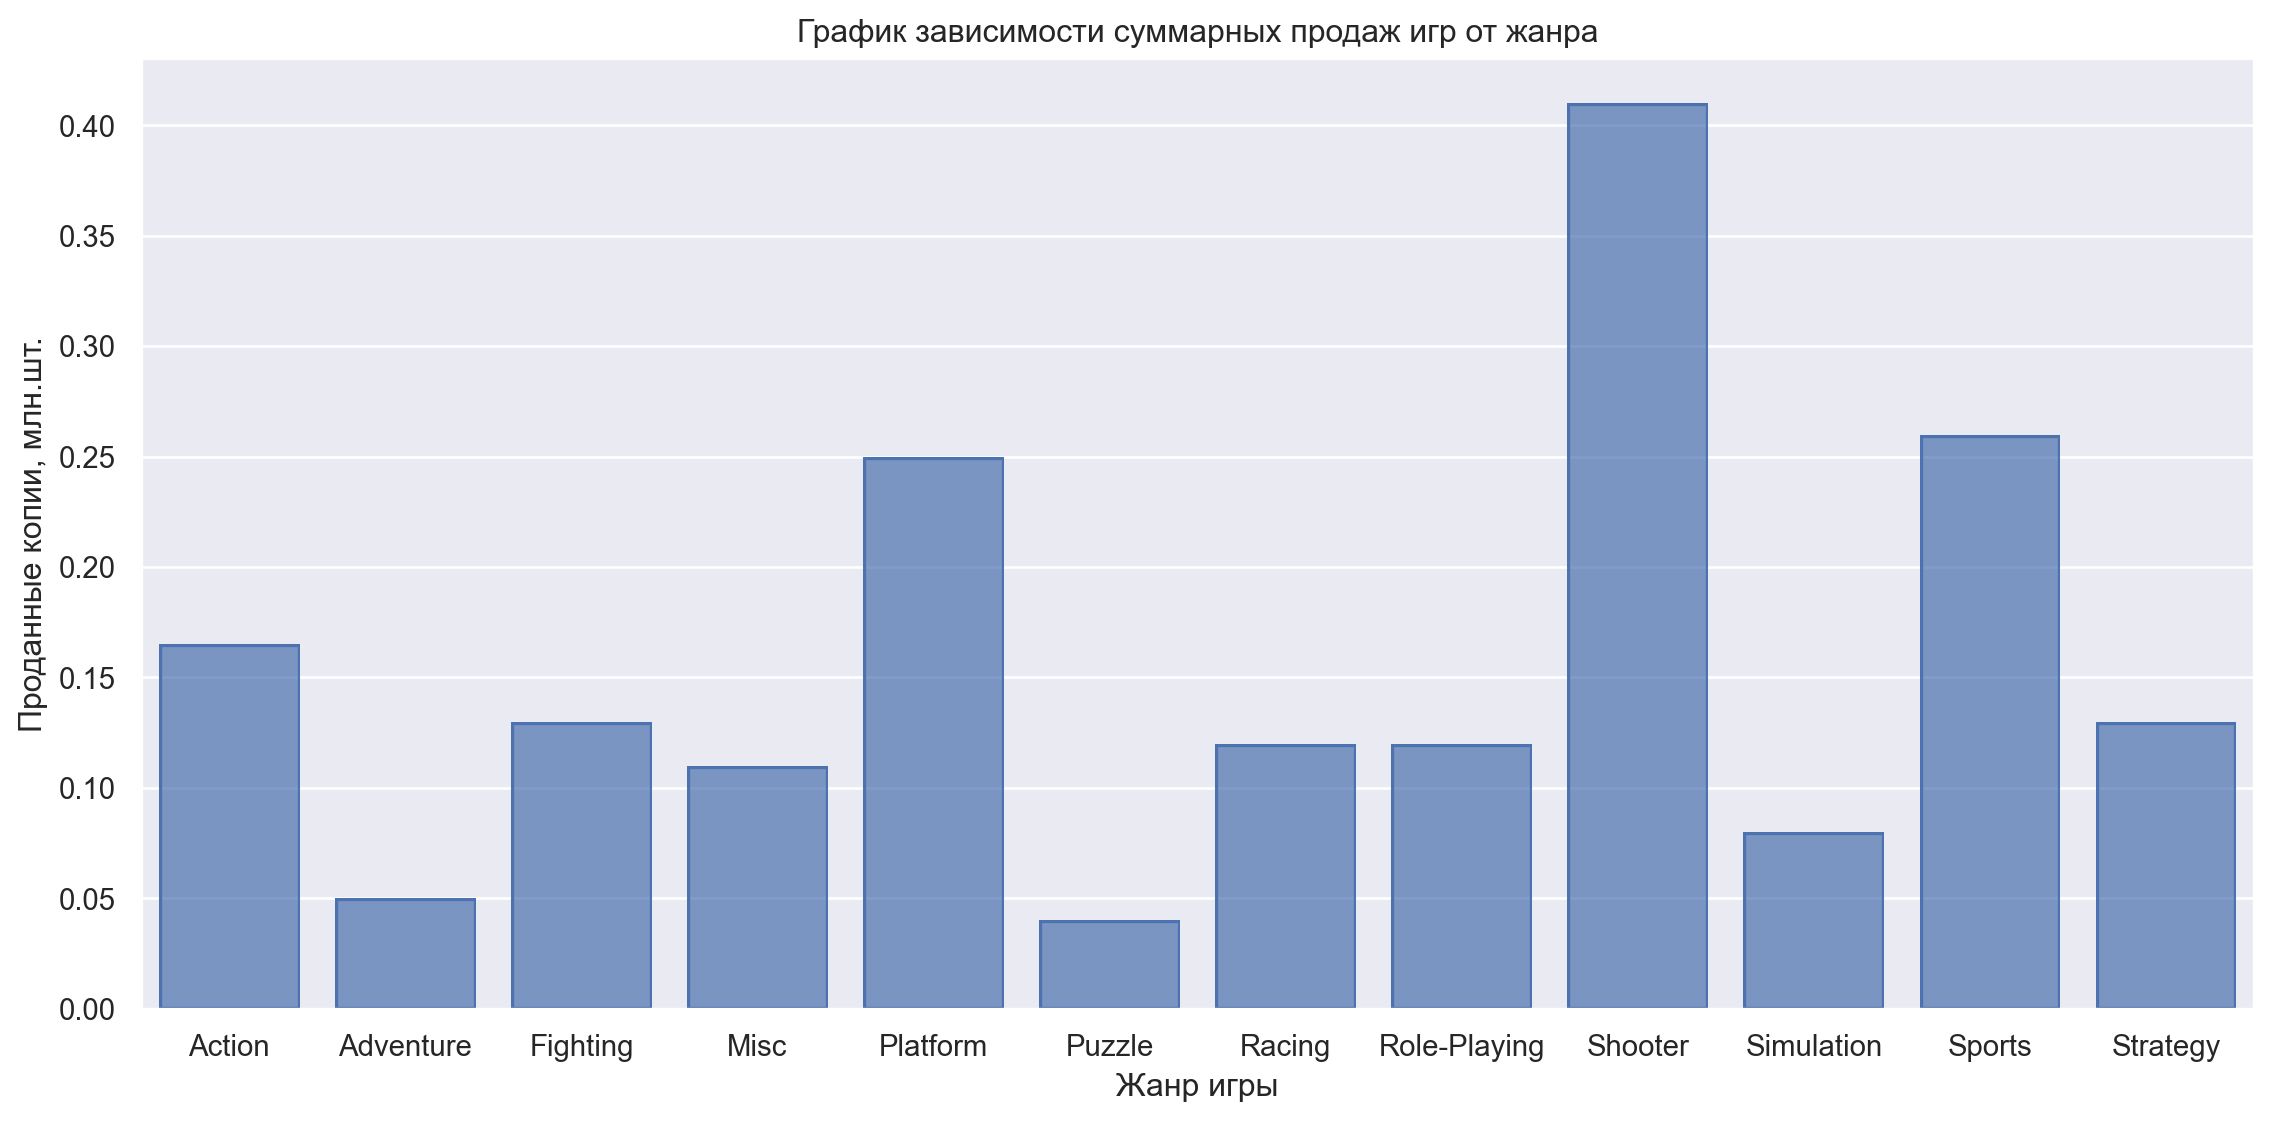

In [67]:
(
    so.Plot(
        data=df_12.query('platform == "PS3"'),
        x='genre',
        y='all_sales',
    )
    .add(so.Bar(), so.Agg('median'))
    .label(title='График зависимости суммарных продаж игр от жанра', x='Жанр игры', y='Проданные копии, млн.шт.')
    .layout(size=(12, 6))
    # .scale(x=so.Continuous().tick(every=10))
)

Самые прибыльные жанры Shooter и Sports. Самые непродаваемые - Puzzle и Adventure.

## 5. Портрет пользователя

Попробуем описать обычного пользователя для каждого представленного региона.

### Топ-5 платформ по продажам.

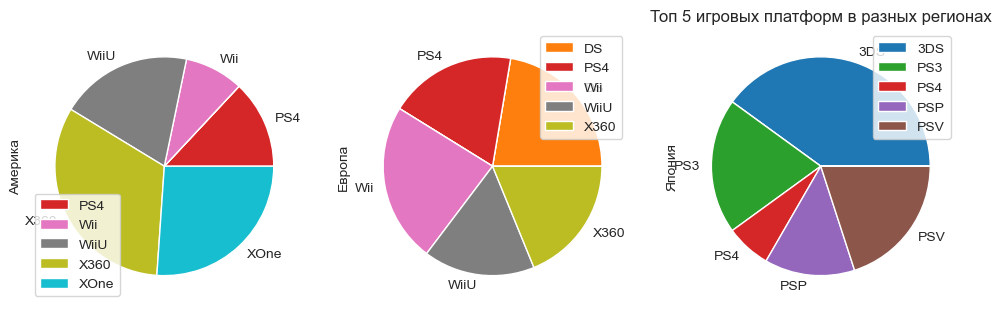

In [68]:
na = df_12.groupby('platform')['na_sales'].median().sort_values(ascending=False).head()
eu = df_12.groupby('platform')['eu_sales'].median().sort_values(ascending=False).head()
jp = df_12.groupby('platform')['jp_sales'].median().sort_values(ascending=False).head()
df_pie = pd.DataFrame({'Америка': na, 'Европа': eu, 'Япония': jp})
plot = df_pie.plot.pie(subplots=True, figsize=(12, 8))
plt.title("Топ 5 игровых платформ в разных регионах")
plt.show()

XOne и X360 чаще предпочитают покупать в америке. Xbox - родная для них приставка, поэтому большая доля продаж. В европе большая доля у Wii, остальные распределены примерно равными долями. А японцы предпочитают мобильные платформы 3DS и PSV.

### Топ-5 жанров по продажам

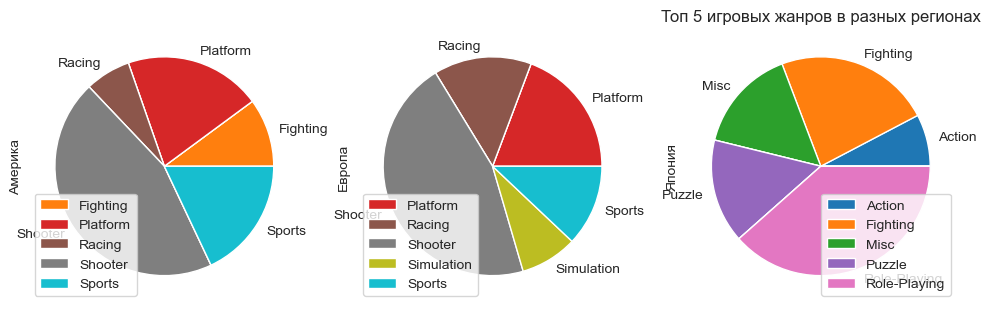

In [69]:
na = df_12.groupby('genre')['na_sales'].median().sort_values(ascending=False).head()
eu = df_12.groupby('genre')['eu_sales'].median().sort_values(ascending=False).head()
jp = df_12.groupby('genre')['jp_sales'].median().sort_values(ascending=False).head()
df_pie = pd.DataFrame({'Америка': na, 'Европа': eu, 'Япония': jp})
plot = df_pie.plot.pie(subplots=True, figsize=(12, 8))
plt.title("Топ 5 игровых жанров в разных регионах")
plt.show()

Здесь американцы и европейцы не отличились. Любят простые шутеры. А вот японцы традиционно любят РПГ.

### ESRB для каждого региона

Посмотрим как влияет рейтинг ESRB на графиках. Малопредставленные категории и 'unknown' учитывать не будем.

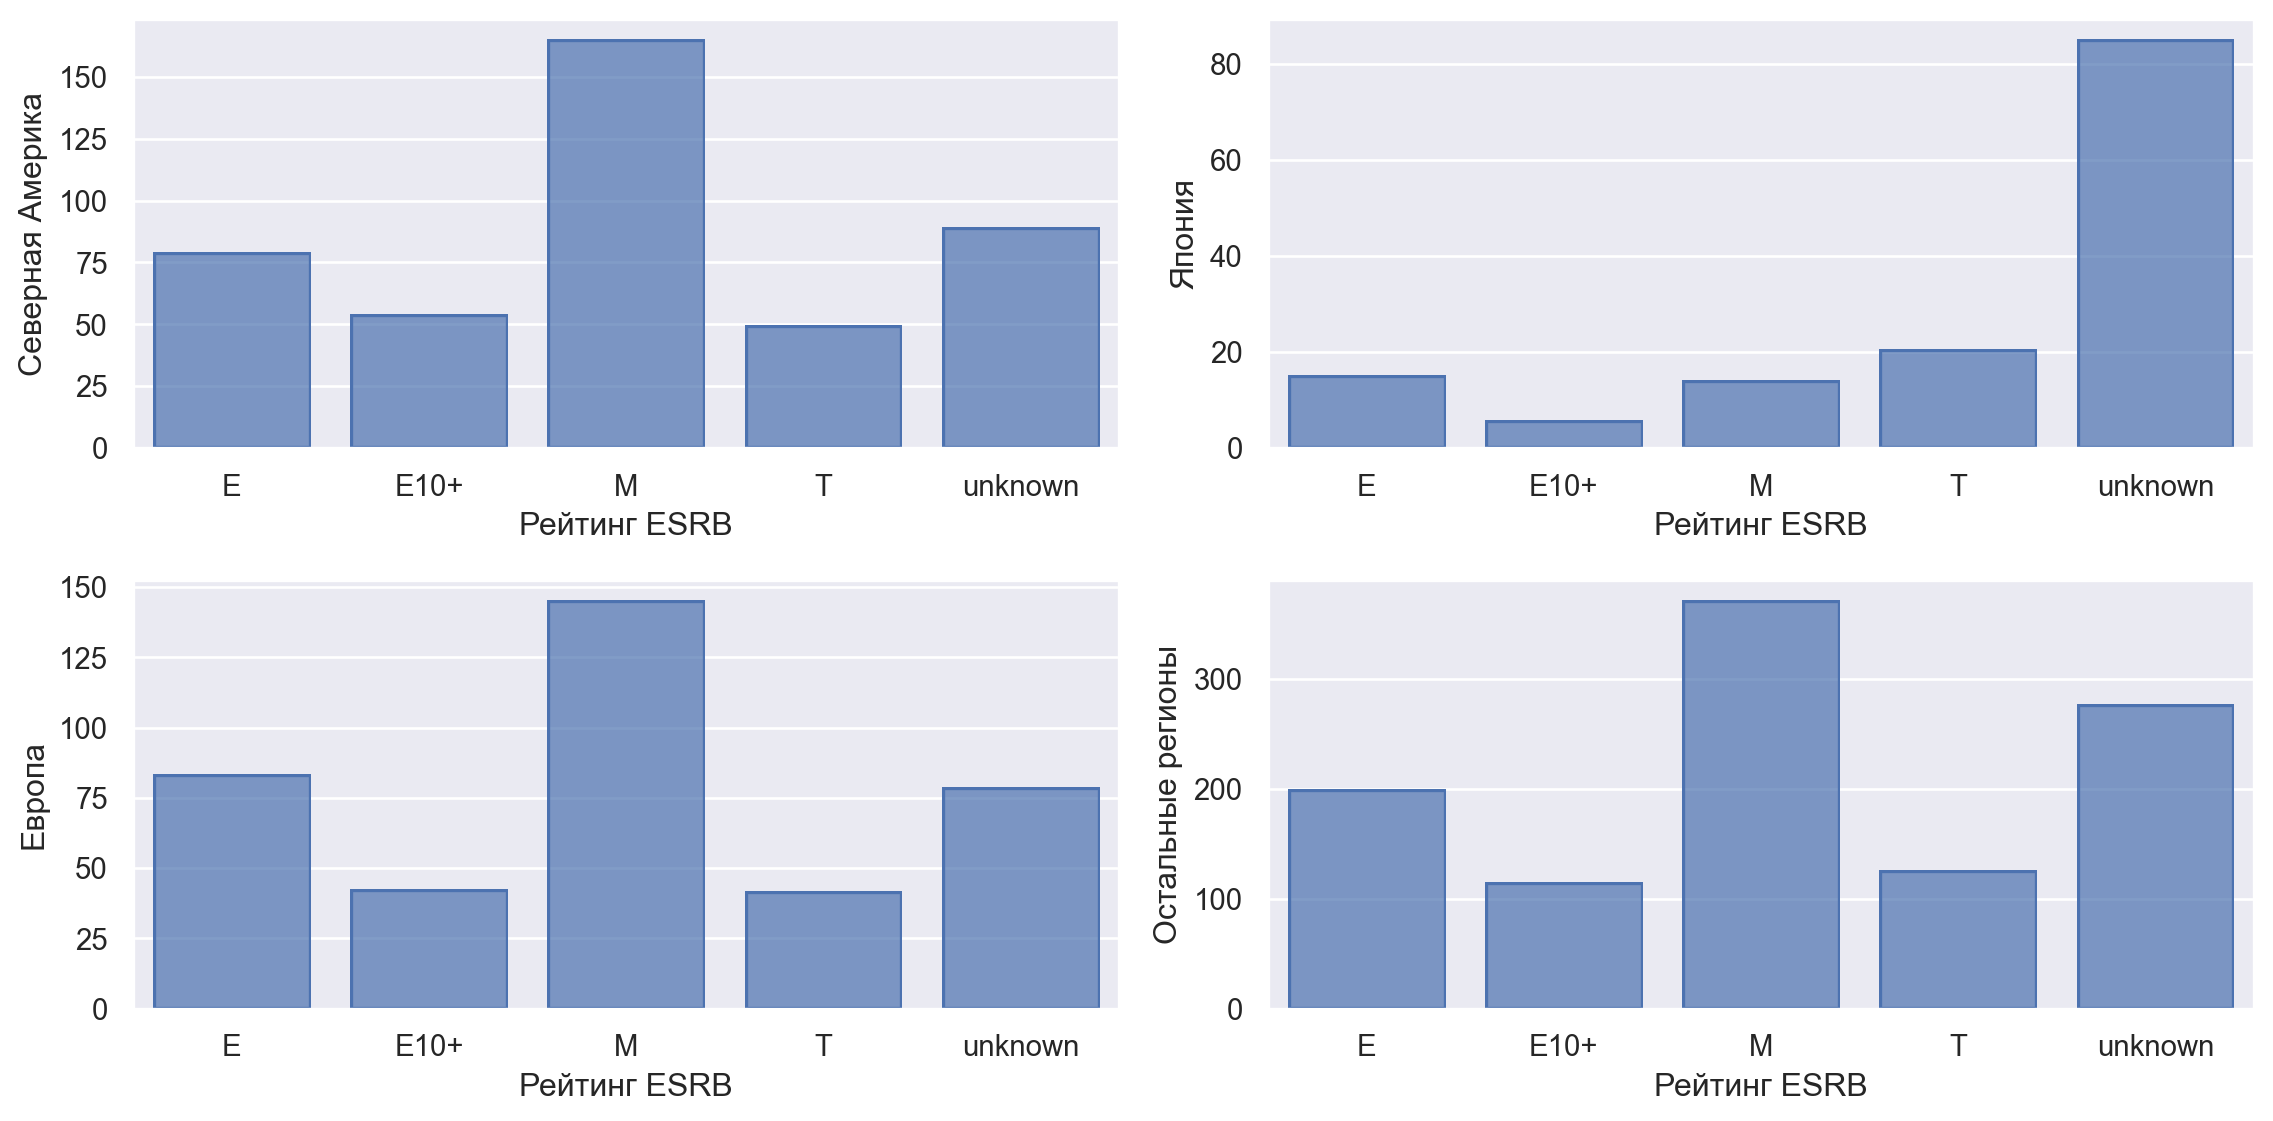

In [70]:
(
    so.Plot(
        data=df_12,
    )
    .pair(y=['na_sales', 'eu_sales', 'jp_sales', 'all_sales'], x=['rating'], wrap=2)
    .add(so.Bar(), so.Agg('sum'), so.Stack())
    # .label(title='График зависимости суммарных продаж игр от оценок')
    .label(
        x0="Рейтинг ESRB", x1="Рейтинг ESRB", x2="Рейтинг ESRB", x3="Рейтинг ESRB", 
        y0="Северная Америка", y1="Европа", y2="Япония", y3="Остальные регионы")
    .layout(size=(12, 6))
)

Восстребованы игры с рейтингом 'M' - почти везде. Одновременно плохо продаются игры с рейтингом для детей от 10 лет 'E10+' и для подростков 'T' от 13 лет. Япония немного отличается - там продаются больше игры с неизвестным рейтингом ESRB. Скорее всего там много своих уникальных игр свойственных для этого региона, и возможно есть свой рейтинг.

## 6. Гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза 0:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Алтернативная гипотеза:
- Средние пользовательские рейтинги платформ Xbox One и PC разные

Посчитаем p_value, чтобы опровергнуть 0 гипотезу.

In [71]:
sample_1 = df.query('platform == "XOne" and user_score.notna()')['user_score']
sample_2 = df.query('platform == "PC" and user_score.notna()')['user_score']

In [72]:
results = st.ttest_ind(sample_1, sample_2)
results.pvalue

1.3039339221792039e-05

Значение p-value получилось очень маленьким. Bероятность случайно получить такое или большее различие между оценками пользователей платформ Xbox One и PC равно 0.00013 %. Что говорит о том, что можно смело отбросить нулевую гипотезу. Посмотрим отдельно на средние значения.

In [73]:
print('Средняя пользовательская оценка XOne:', sample_1.mean().round(2))
print('Средняя пользовательская оценка PC:', sample_2.mean().round(2))

Средняя пользовательская оценка XOne: 6.52
Средняя пользовательская оценка PC: 7.07


Видим значительное отличие. Всё этоговорит о том, что можно отбросить нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC разные.

### Средние пользовательские рейтинги жанров Action и Sports разные

Гипотеза 0:
- Средние пользовательские рейтинги жанров Action и Sports одинаковые

Алтернативная гипотеза:
- Средние пользовательские рейтинги жанров Action и Sports разные

In [74]:
sample_1 = df.query('genre == "Action" and user_score.notna()')['user_score']
sample_2 = df.query('genre == "Sports" and user_score.notna()')['user_score']

In [75]:
results = st.ttest_ind(sample_1, sample_2)
results.pvalue

0.0706447801951415

7.06 % - вероятность получить еще большие различия в оценках. Тут всё зависит от того, какой выбрать уровень статистической значимости альфа. Если брать самый распросстраненный вариант в 5%, то можно говорить, что 0 гипотеза верна.

In [76]:
print('Средняя пользовательская оценка в жанре Action:', sample_1.mean().round(2))
print('Средняя пользовательская оценка в жанре Sports:', sample_2.mean().round(2))

Средняя пользовательская оценка в жанре Action: 7.06
Средняя пользовательская оценка в жанре Sports: 6.95


Значение средних оценок очень близкое. Нулевая гипотеза верна. Средние пользовательские рейтинги жанров Action и Sports одинаковые.

## 7. Общий вывод

Были рассмотренны данные по количеству продаж компьютерных игр по всему миру и по трем регионам в частности: Северная Америка, Европа и Япония. Данные представленны за период с 1980 по 2016 годы включительно.<br>
Были удалены дублирующиеся данные по названиям игр с сохранением данных о продажах. Просуммированы продажи по всем регионам.<br>
Изменен рейтинг ESRB на современный.<br>
Проанализированы данные по продажам за последние 4 года.
Что было выявлено:

- Продажи игр снижаются подряд последние 8 лет
- Пик продаж пришёлся на 2008 год
- Потенциально растущие платформы по продажам за последний год: PS4 и Xbox One
- Самые продающиеся жанры: Sports, Shooter для европейского и амерканского рынка, и отдельно для Японии - RPG
- Самые не продающиеся: Puzzle и Adventure
- Чем больше оценка игры от критиков или пользователей, тем больше продаж. Только если оценки не превышают 80 и 8 баллов соответственно.
- Каждая новая успешная платформа держится на рынке 6-8 лет. Пик продаж наступает через 3 - 4 года после выхода первой игры.

Определяющие факторы для успешных продаж в следующем году для каждого рынка свои. Американцы любят игры на приставках Xbox в жанре Shooter или Sport с рейтингом 'E' или 'M' по ESRB. Европейцы любят приставки PS4 и Wii, также любят шутеры, гонки и спортивные игрушки с рейтингом 'E' и 'M'. А вот японцы обожают мобильные платформы 3DS и PSV, с закаченными РПГ или файтингами своих разработок, про которые ничего не знает ESRB. Для любого региона чем больше оценка критиков игры, тем лучше она продается. За исключением оценок выше 80. Для оценок пользователей работает это же правильно, только оценка должна быть не выше 8.

Потенциально самая прибыльная игра в следующем году для разных рынков:
- Shooter на X360 с рейтингов ESRB - 'M' для Америки
- Shooter на PS4 с рейтингом ESRB - 'M' для Европы
- RPG на мобильной DS или PSV без рейтинга ESRB для Японии

Рейтинг ESRB не сильно влияет на продажи. Единственное, что можэно сказать - игры для детей от 10 лет продаются хуже, чем все остальные.